In [1]:
# Description: This program predicts employee attrition.

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Load the data 
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head() #Print the first rows

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
#Get the number of rows and number of columns in the data
df.shape

(1470, 35)

In [6]:
#data types, columns info and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Their are 1470 rows of data or employees in the data set and 35 columns or data points on each employee.
No null values, good!
The type of data we have is object and integer. Ok!

In [7]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#Another check for any null / missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
#View some basic statistical: percentile, mean, standard deviation etc.
df.describe()


Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

OK, we can confirm there is no missing data as we said previously.

EmployeeCount,Standard Hours is a constant column with all values being 1 and 80 respectively. So we can discard them for our analysis. We will do it later!
EnvironmentSatisfaction needs further study in order to understand it compared to the target Attrition variable.

Seems we have seweral columns with outliers but the highlighted ones are TotalWorkingYears and YearsWithCurrManager as the max is much higher than 17% percentile.

Almost all the columns are positively skewed except Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance. These columns are either negatively skewed, means mean is lesser than the mean, or almost normalized.




In [12]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:

#importing libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


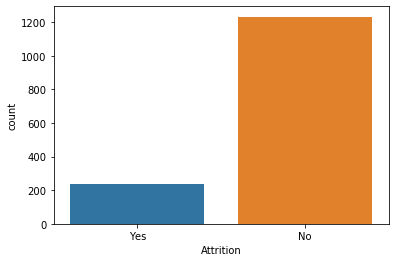

In [14]:
#Visualize this count 

sns.countplot(df['Attrition'])

In [15]:
(df.Attrition.value_counts()/len(df.index))*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

As you can notice from the above split, it's imbalance dataset, where 83.87% data have attrition label has "No" and only 16.12% data has got attrition rate has "yes".

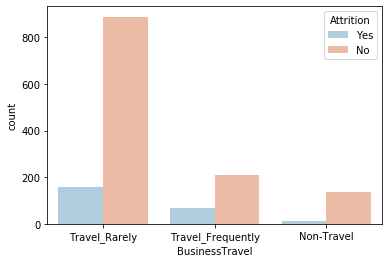

In [16]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='RdBu_r')

We can see and highlight that the employees who travel rarely for business are more likely to stay and with NO Attrition.

We can also comment the employees who either travel frequently or do not travel are less to be Attrited.

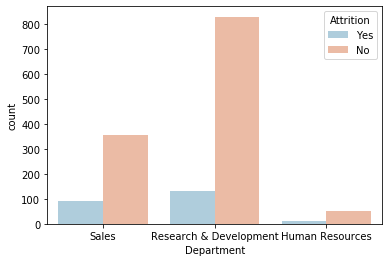

In [17]:
sns.countplot(x='Department',hue='Attrition',data=df,palette='RdBu_r')

Here what we should highlight is that we have a lot of variance in Attrition feature in case if the department is R&D as the possibility of the employee not to be attrited is much higher compared to Employee that are attrited.

In case of Sales and HR dept, we have a bit of variance in case of Sales dept but not significantly noticeable in the HR dept.

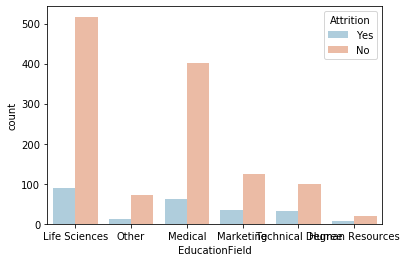

In [18]:
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='RdBu_r')

Here we can notice Life science studies and MedicalEducation Field are more likely to not be attrited.

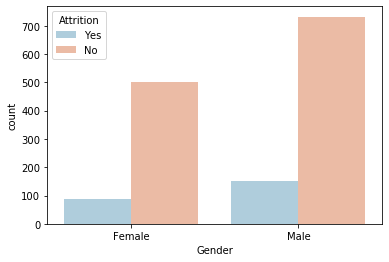

In [19]:
sns.countplot(x='Gender',hue='Attrition',data=df,palette='RdBu_r')

Here what we should highlight is that Males are much more likely to not be attrited than womens.
Anyway, males are also more likely to be attrited compared to women but in this case, the difference is not that noticeable.

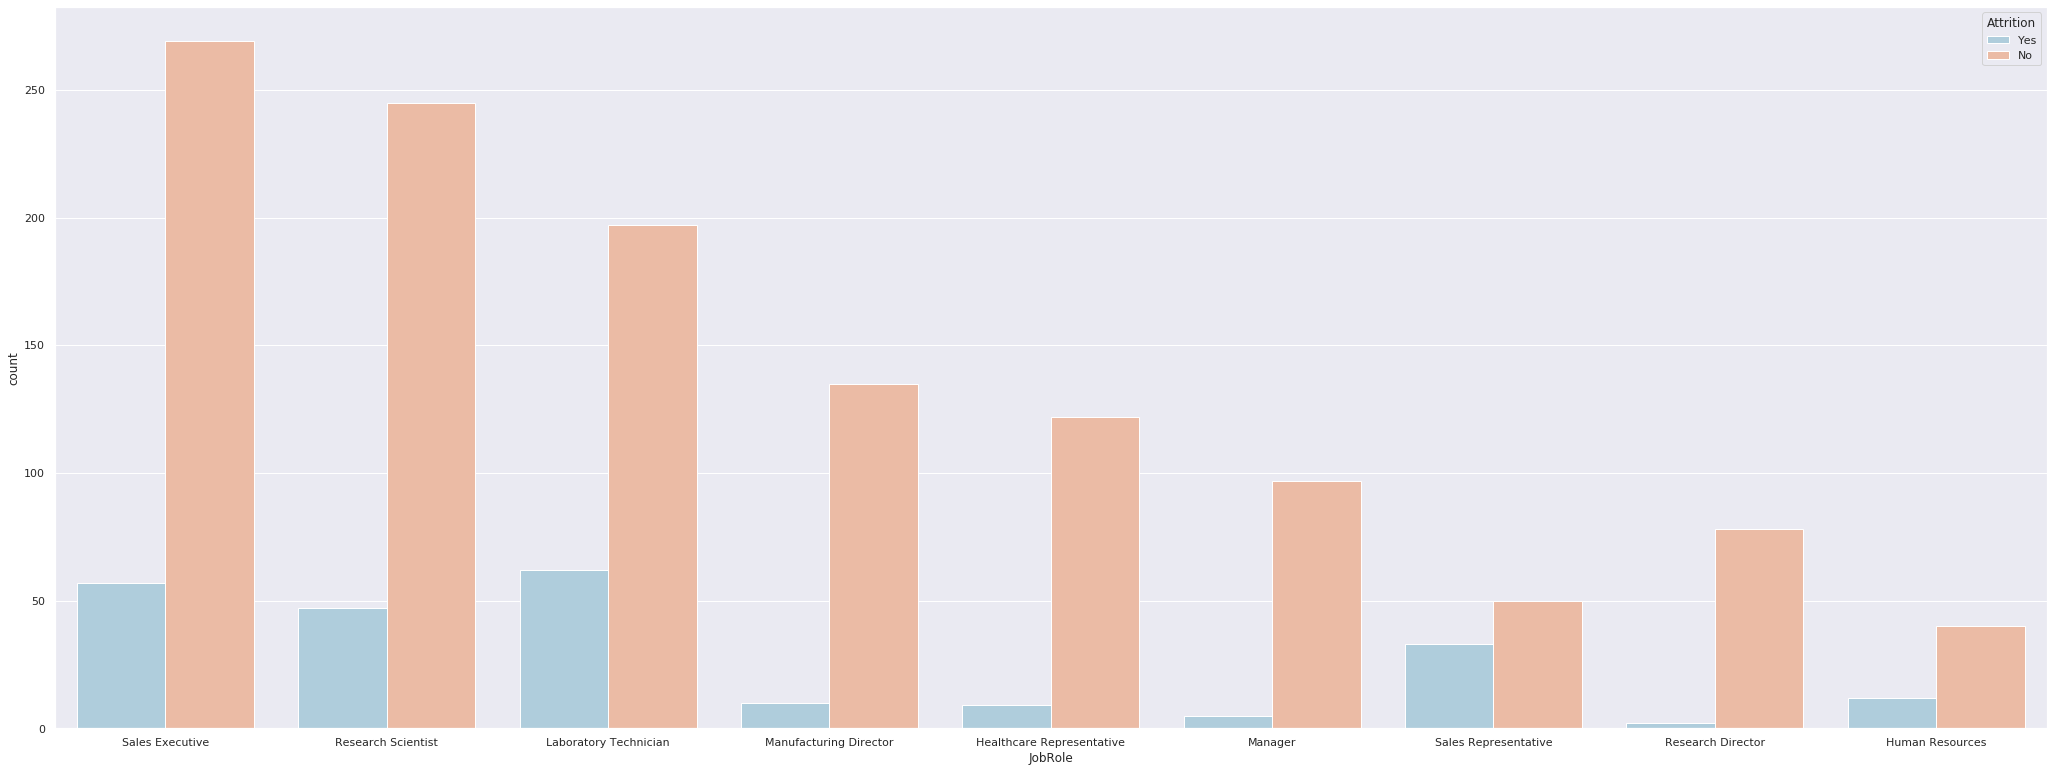

In [20]:
sns.set(rc={'figure.figsize':(35.7,13.27)})
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='RdBu_r')

As we can see, at first sight, as we know we have more employess impenitenced than employess attrited.

What we should also mention is tht Sales Executive, Research Scientist and Laboratory Technician are more likely to have employees impenitence than the others.

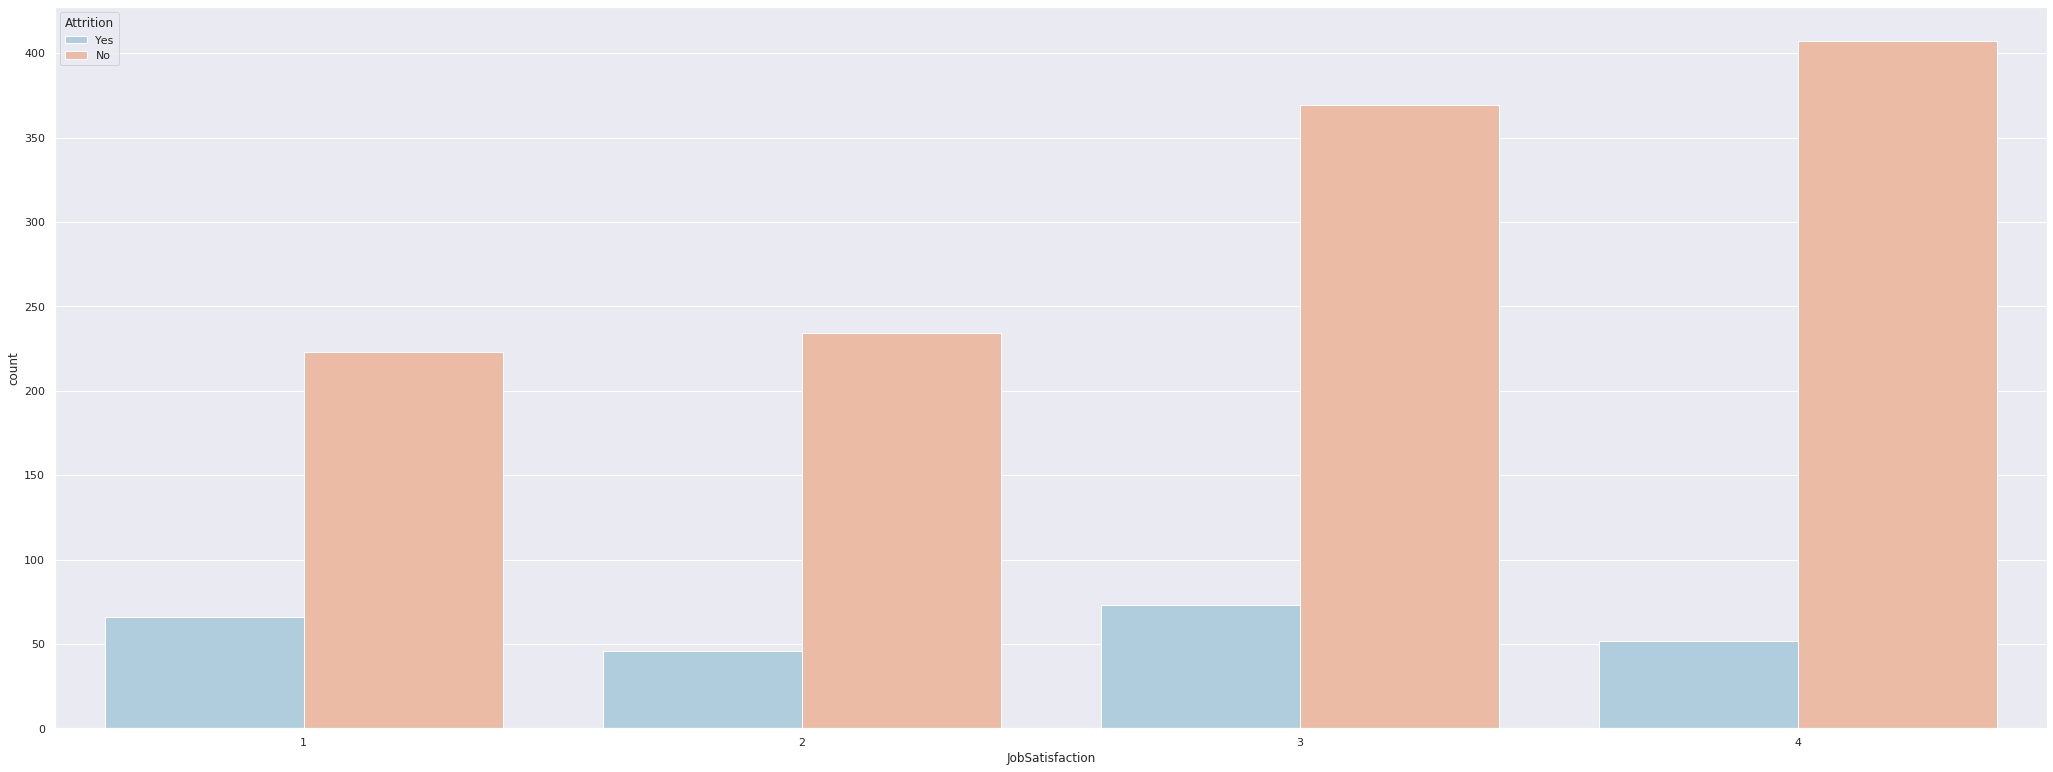

In [21]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette='RdBu_r')

Here what we can see and notice is that No Attition is more often to happen independtly of the level of job satisfaction. What we should mention is that level 3 or level 4 of job satisfaction is more likely to have the employees impenitenced.

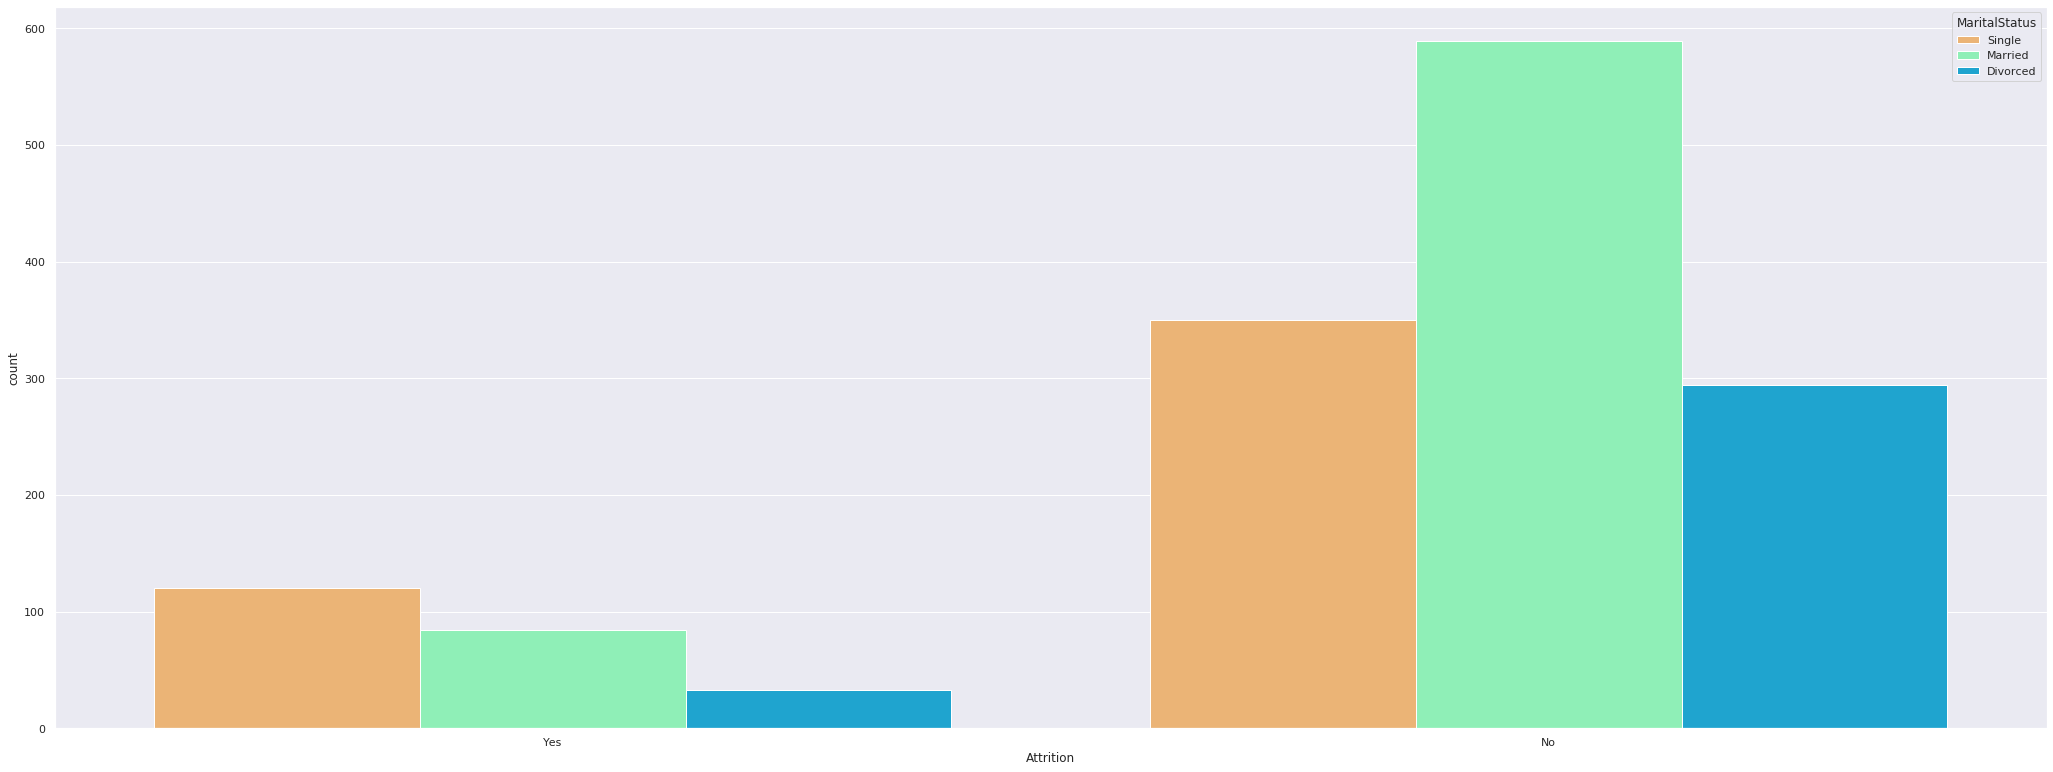

In [22]:
sns.countplot(x='Attrition', hue='MaritalStatus',data=df,palette='rainbow_r')

Hey, interesting! As we already said, we have more employees impenitenced independently of the maritual status. And the interesting part if the following:

that single employees are more likely to be attrited than other two groups. And another interesting insight is that married employees are more likely to be impenitenced than the other 2 groups.

Wow, that's interesting!!

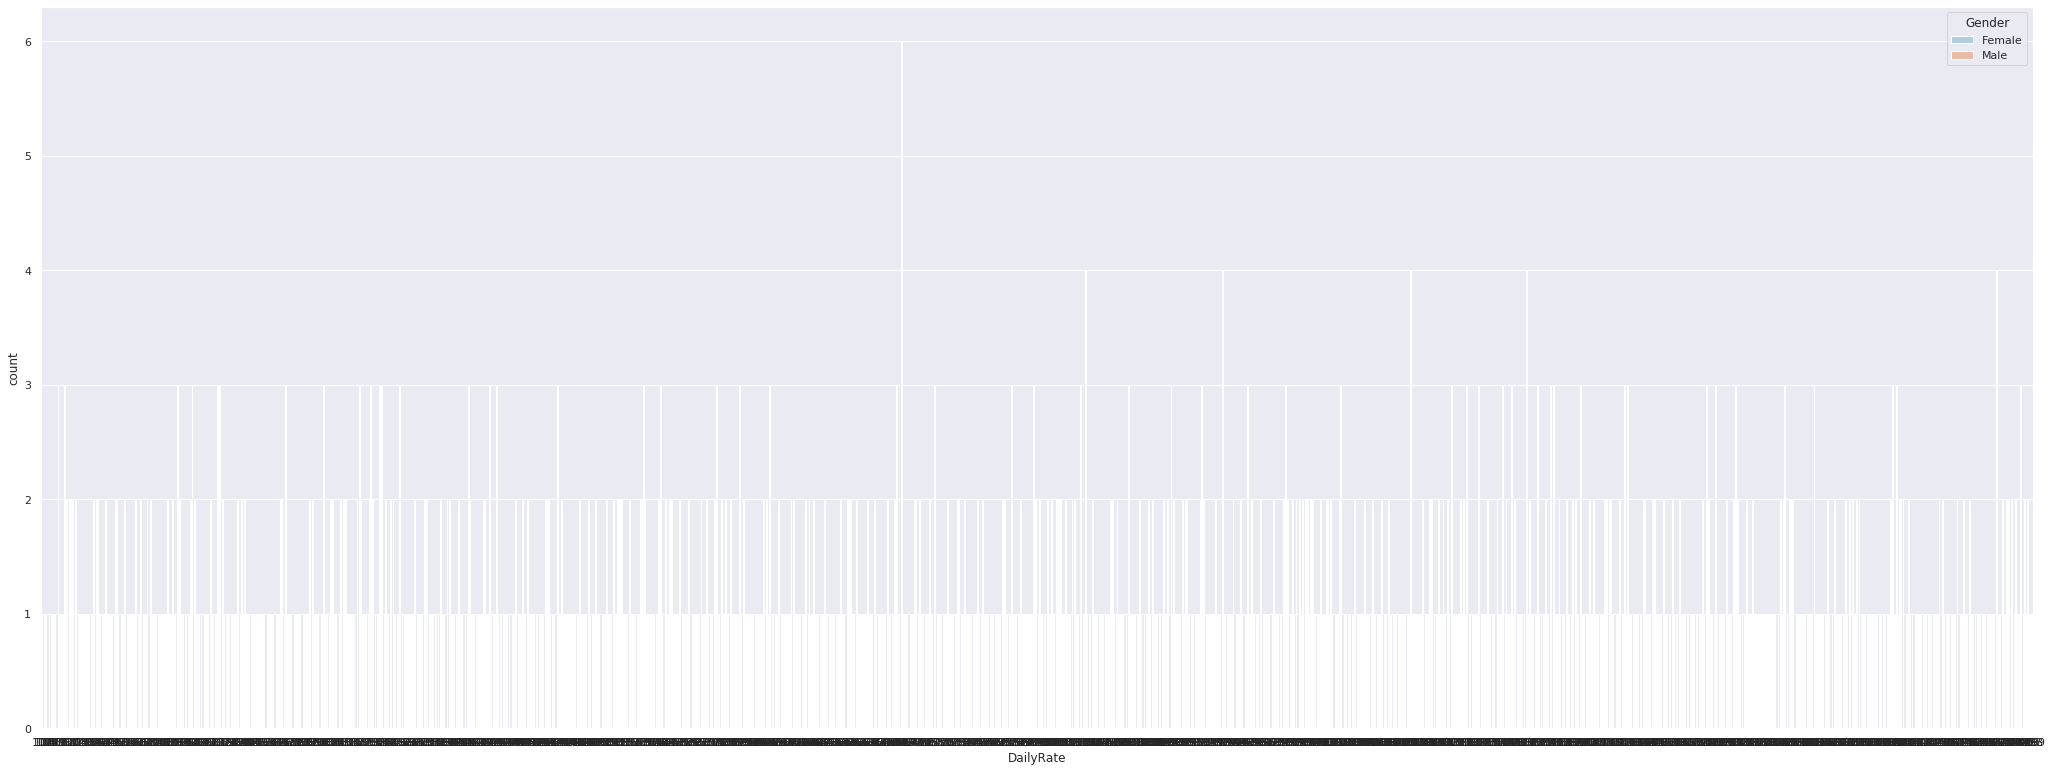

In [23]:
sns.countplot(x='DailyRate',hue='Gender',data=df,palette='RdBu_r')

In [24]:
#nothing to comment or highlight. Everything seems to be normal!

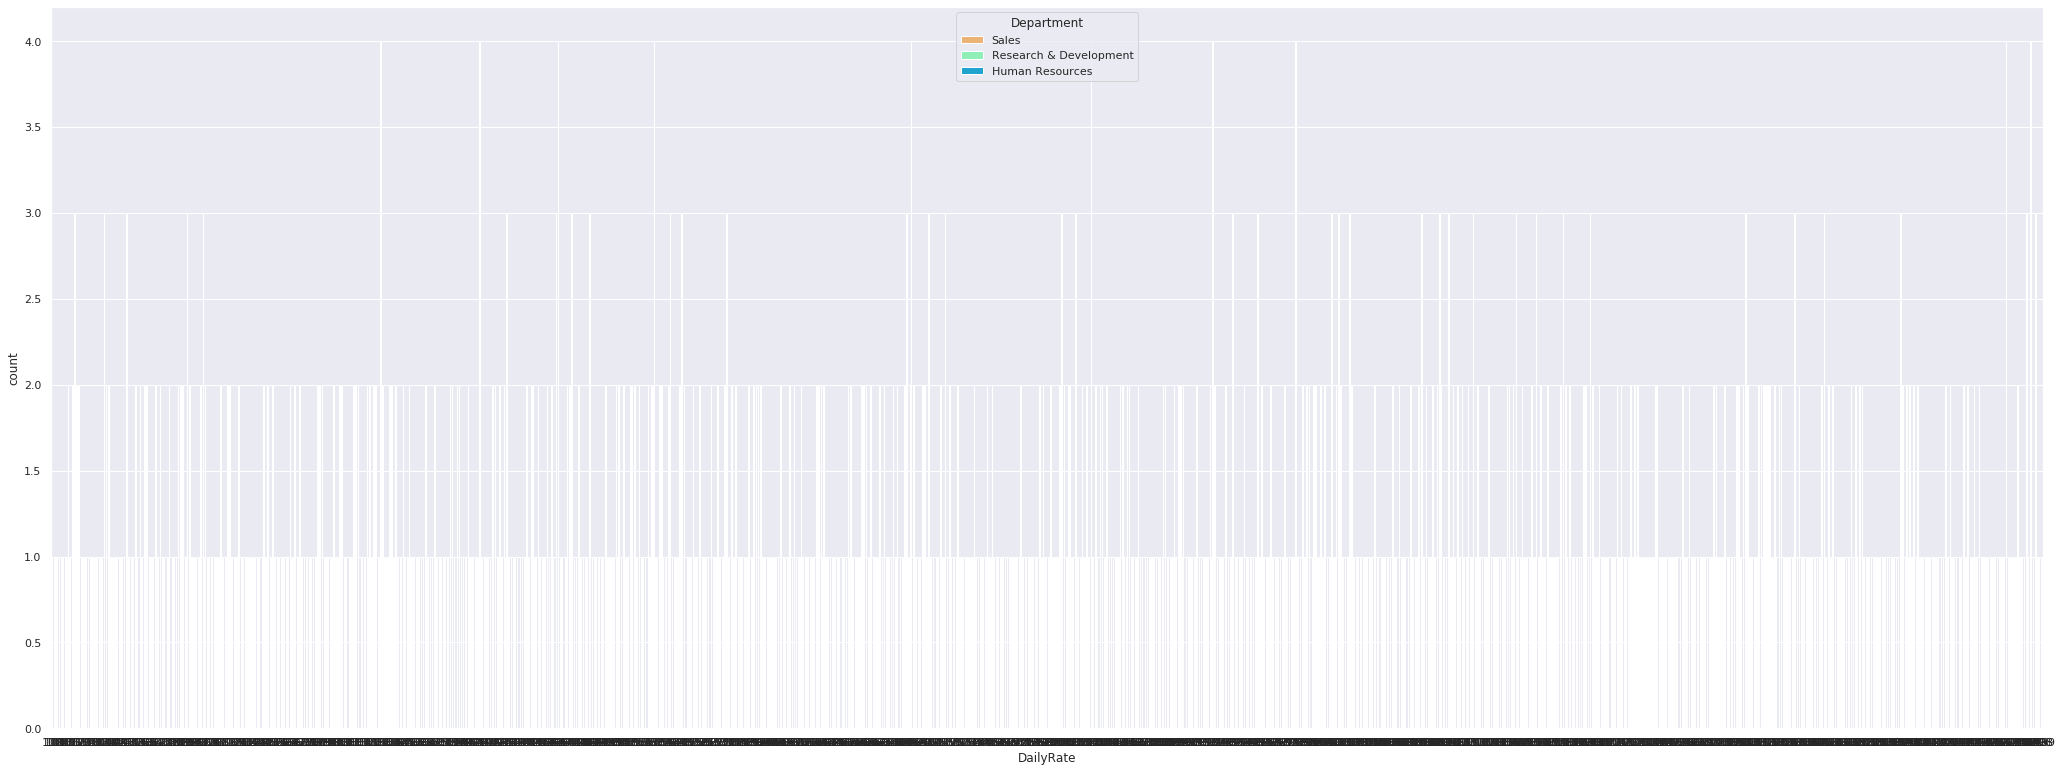

In [25]:
sns.countplot(x='DailyRate',hue='Department',data=df,palette='rainbow_r')

In [26]:
#nothing to comment or highlight. Everything seems to be normal!

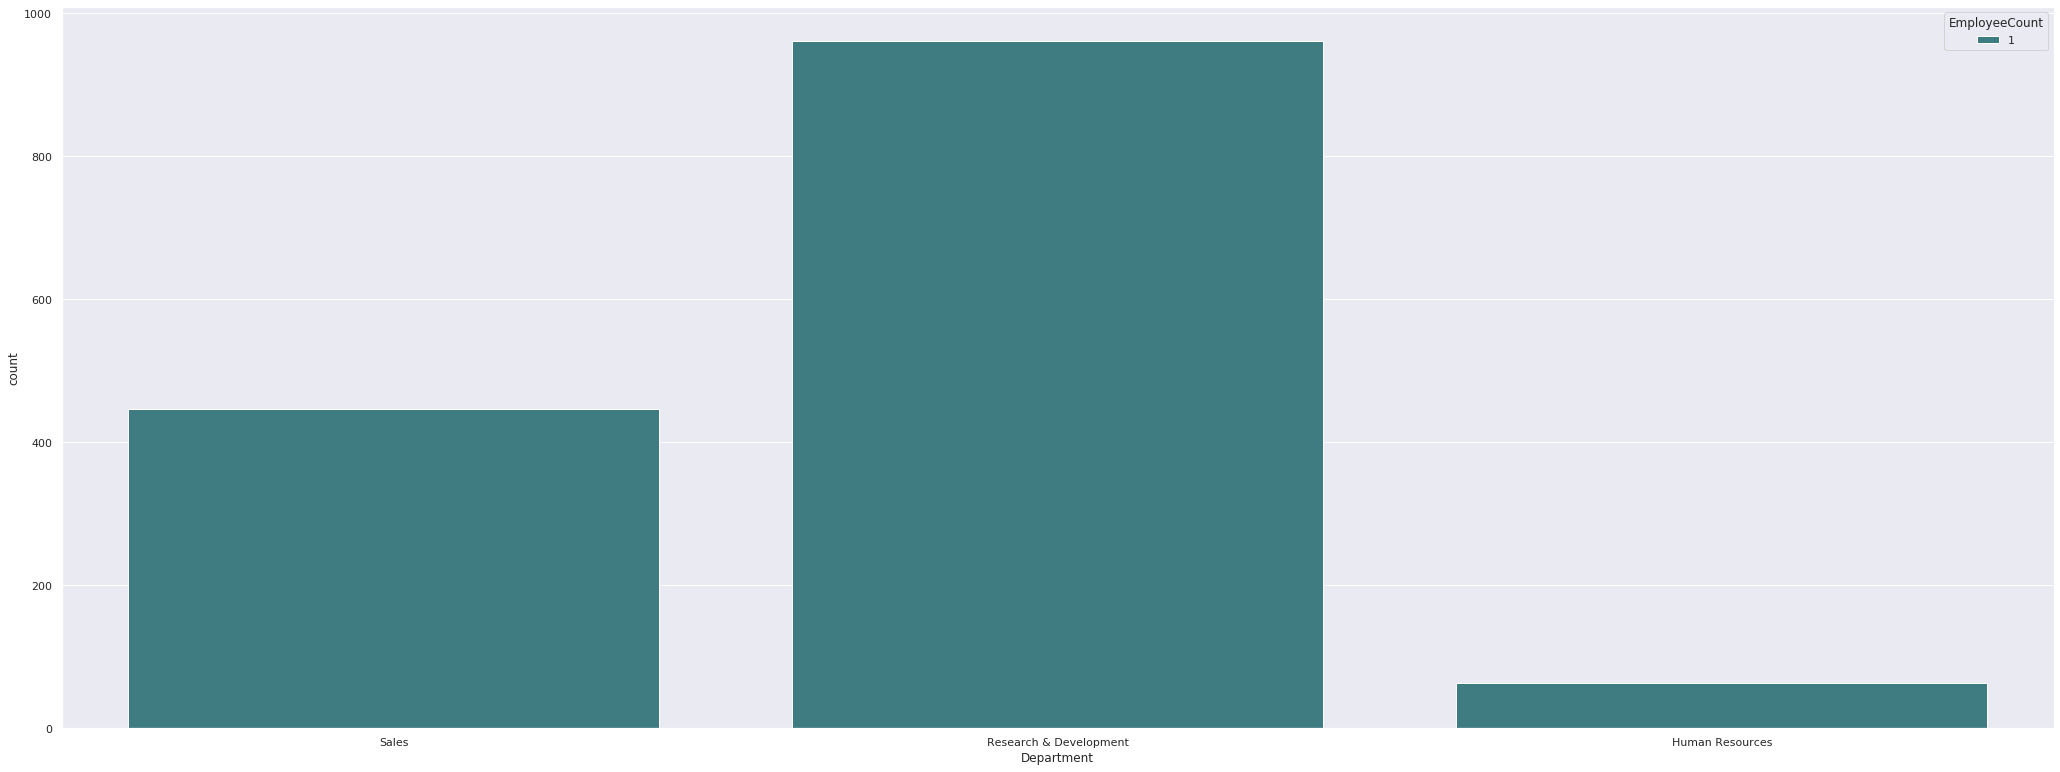

In [27]:
sns.countplot(x='Department',hue='EmployeeCount',data=df,palette='crest')

just for our understanding, in our data we have more R&D employees before Sales and HR, which is very small group compared to other 2 groups.

In [28]:
df['EmployeeCount'].unique()   # will drop it before we do our ML training.

array([1])

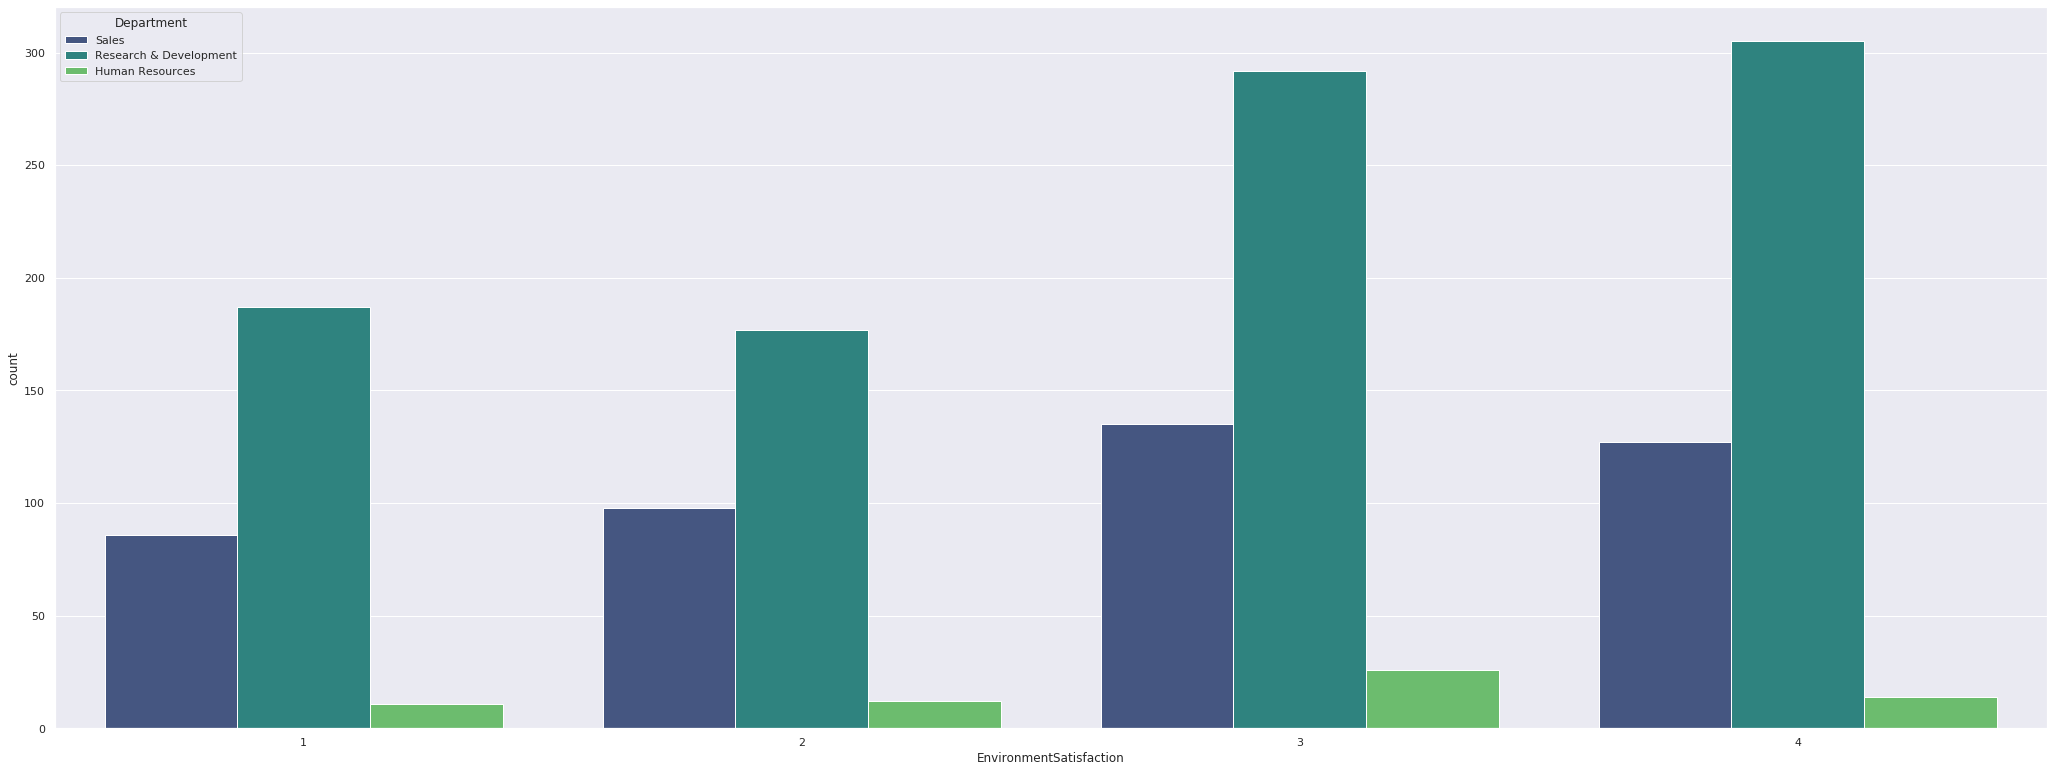

In [29]:
sns.countplot(x='EnvironmentSatisfaction',hue='Department',data=df,palette='viridis')

If we analyze the enviroment satisfaction, we detect that R&D has more environment satisfaction than dept Sales and dept H&R.

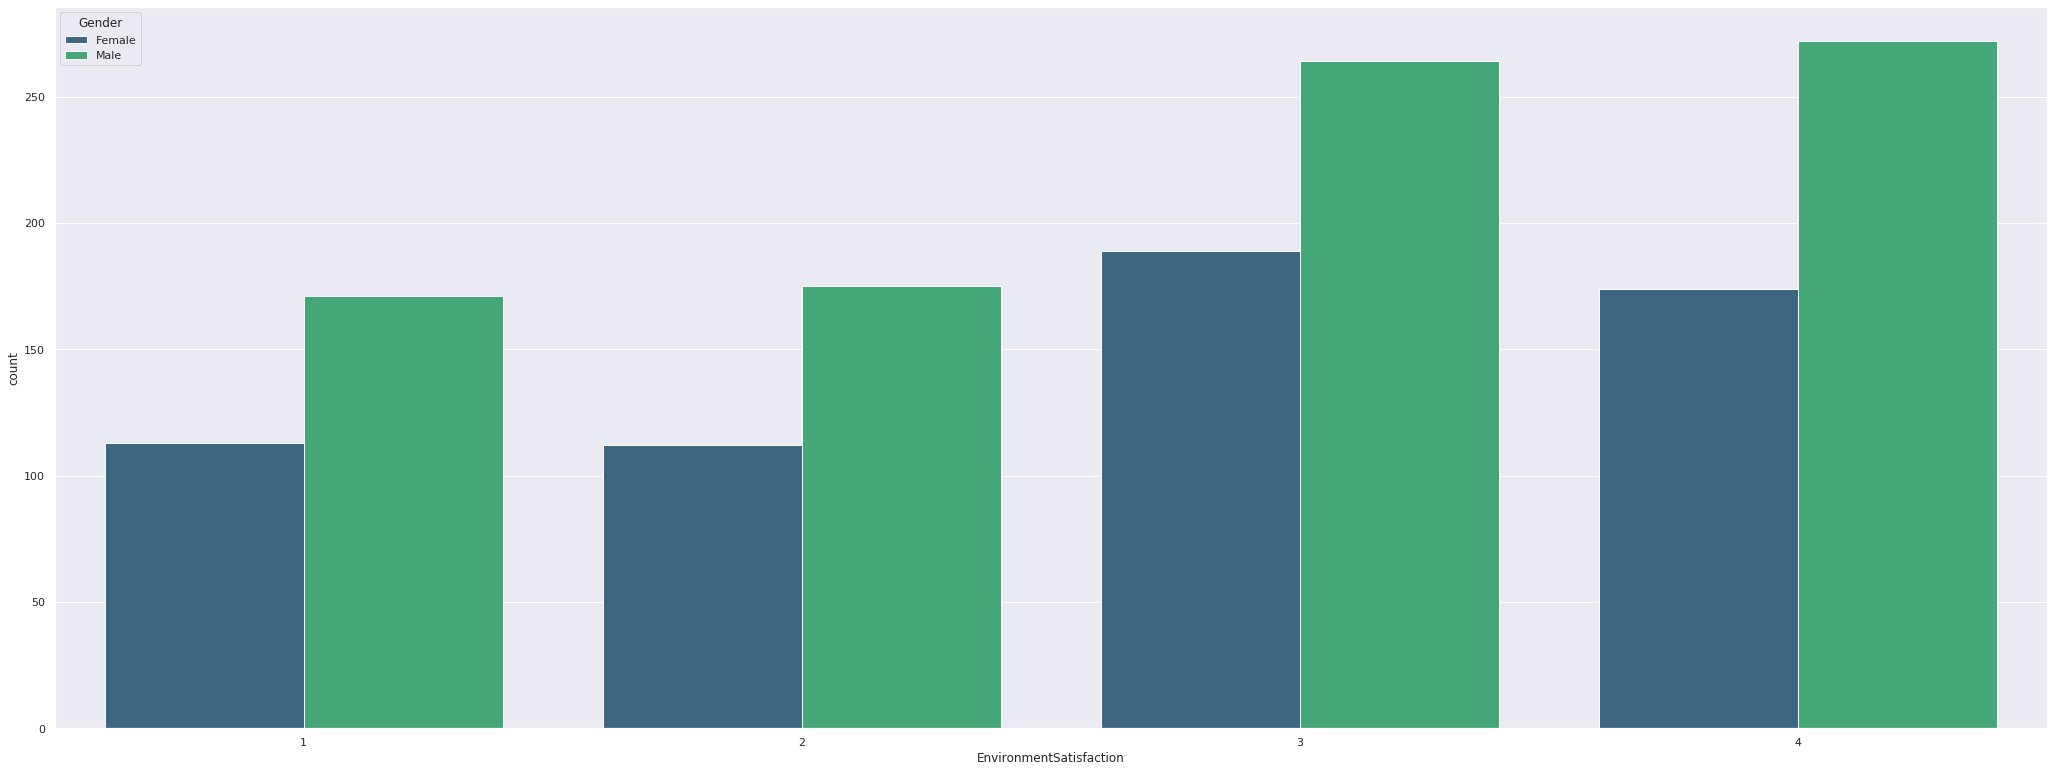

In [30]:
sns.countplot(x='EnvironmentSatisfaction',hue='Gender',data=df,palette='viridis')

And if we check the environment satisfaction by sex, we see Males are more likely to be satisfied than womens. Interesting!

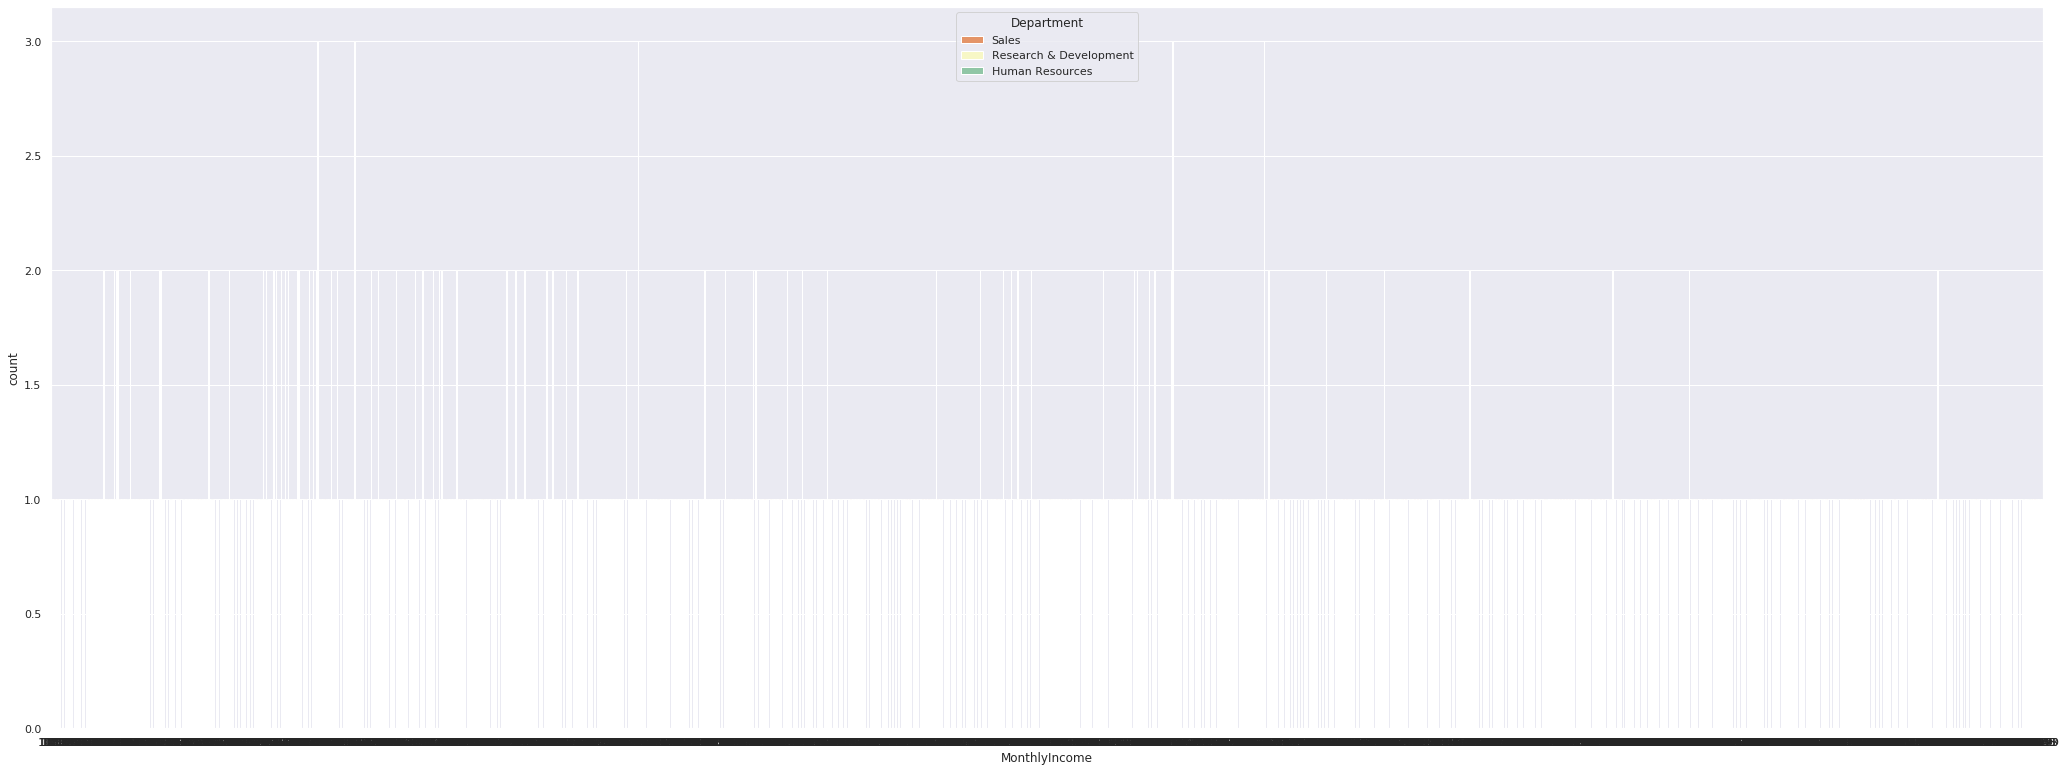

In [31]:
sns.countplot(x='MonthlyIncome',hue='Department',data=df,palette='Spectral')

We can highlight that R&D has more probability to have higher monthly income than other two groups.

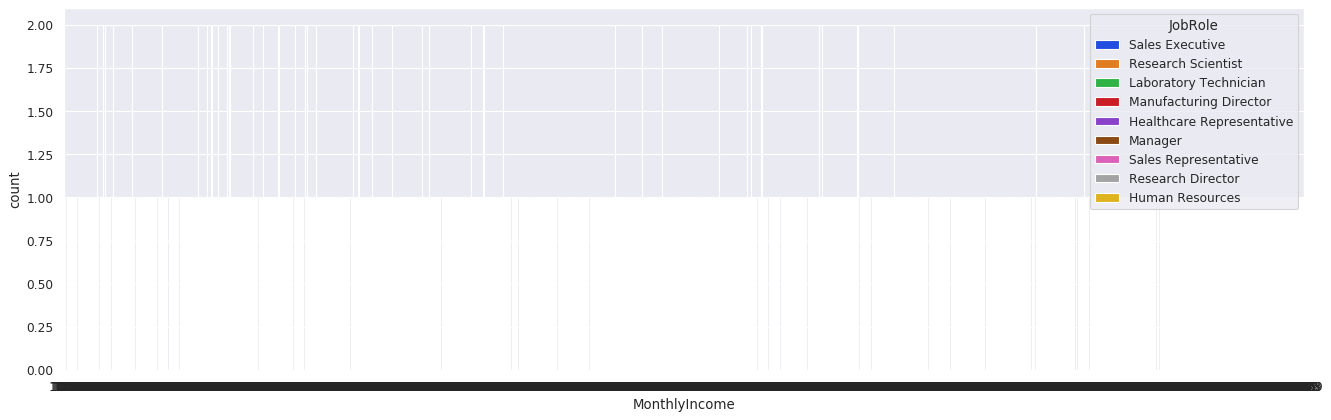

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
sns.countplot(x='MonthlyIncome',hue='JobRole',data=df,palette='bright')

We can notice a laboratory technician, managers and a sales executive have the higher monthy income.

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.sort_values(by=['MonthlyIncome'], axis=0, ascending=False)
#.groupBy(['JobRole'])

Age Attrition     BusinessTravel  DailyRate              Department  \
190    52        No      Travel_Rarely        699  Research & Development   
746    41        No         Non-Travel        247  Research & Development   
851    56        No      Travel_Rarely        718  Research & Development   
165    50        No      Travel_Rarely       1452  Research & Development   
568    55       Yes      Travel_Rarely        725  Research & Development   
918    51        No  Travel_Frequently        237                   Sales   
749    52       Yes      Travel_Rarely        266                   Sales   
1242   40        No      Travel_Rarely        611                   Sales   
898    43        No      Travel_Rarely        920  Research & Development   
956    56        No      Travel_Rarely        206         Human Resources   
1009   58        No      Travel_Rarely       1055  Research & Development   
1331   48        No      Travel_Rarely       1224  Research & Development   
1154   47        No      Travel_Rarely       1176         Human Resources   
1401   55        No      Travel_Rarely        189         Human Resources   
770    46        No      Travel_Rarely        430  Research & Development   
814    40        No      Travel_Rarely       1308  Research & Development   
1129   42        No      Travel_Rarely       1059  Research & Development   
1116   55        No      Travel_Rarely        685                   Sales   
411    60        No      Travel_Rarely        422  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
123    51        No      Travel_Rarely        684  Research & Development   
233    50        No      Travel_Rarely        854                   Sales   
497    44        No      Travel_Rarely       1315  Research & Development   
473    49        No      Travel_Rarely       1245  Research & Development   
257    40        No      Travel_Rarely       1416  Research & Development   
1437   39        No         Non-Travel        105  Research & Development   
716    41        No  Travel_Frequently        840  Research & Development   
392    54        No      Travel_Rarely        821  Research & Development   
1330   43        No      Travel_Rarely        823  Research & Development   
1126   50        No      Travel_Rarely        264                   Sales   
1277   46        No      Travel_Rarely        734  Research & Development   
326    39        No  Travel_Frequently        672  Research & Development   
595    58       Yes      Travel_Rarely        286  Research & Development   
766    50        No      Travel_Rarely       1464  Research & Development   
231    42        No      Travel_Rarely        532  Research & Development   
244    45        No      Travel_Rarely        252  Research & Development   
400    39        No  Travel_Frequently       1218  Research & Development   
922    44        No      Travel_Rarely       1199  Research & Development   
538    41        No      Travel_Rarely        314         Human Resources   
955    55        No      Travel_Rarely        282  Research & Development   
1377   49        No  Travel_Frequently       1064  Research & Development   
279    50        No      Travel_Rarely        797  Research & Development   
535    41        No      Travel_Rarely        427         Human Resources   
25     53        No      Travel_Rarely       1282  Research & Development   
869    46        No      Travel_Rarely       1450  Research & Development   
237    52        No         Non-Travel        771                   Sales   
1140   44        No      Travel_Rarely       1313  Research & Development   
270    55        No      Travel_Rarely        452  Research & Development   
1264   55        No      Travel_Rarely        478  Research & Development   
186    40        No      Travel_Rarely        989  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
14

We can see, as we mentioned before, R&D has the highest MonthlyIncome. And if we compare the gender, the male gender has a bit more oppotrunity to get one the highest salary in the company.

In [34]:
#let's double check the same by grouping and sorting the monthly income and grouping it y gender:
df1 = df.groupby('Gender')['MonthlyIncome'].value_counts().sort_values(ascending=False)

df1

Gender  MonthlyIncome
Male    2380             3
        2451             3
        2610             3
Female  2109             2
Male    4724             2
        2996             2
        3072             2
        3162             2
        3407             2
        3420             2
        3904             2
        4197             2
        4284             2
        4941             2
        4876             2
        2936             2
        5304             2
        5484             2
        5562             2
        6272             2
        6347             2
        6804             2
        10609            2
        2956             2
        2720             2
        2741             2
        2340             2
        2028             2
        2042             2
        2073             2
        2127             2
        2177             2
        2258             2
        2269             2
        2293             2
        2342             2
Female

We can above that the Male gender has the highest monthly income.

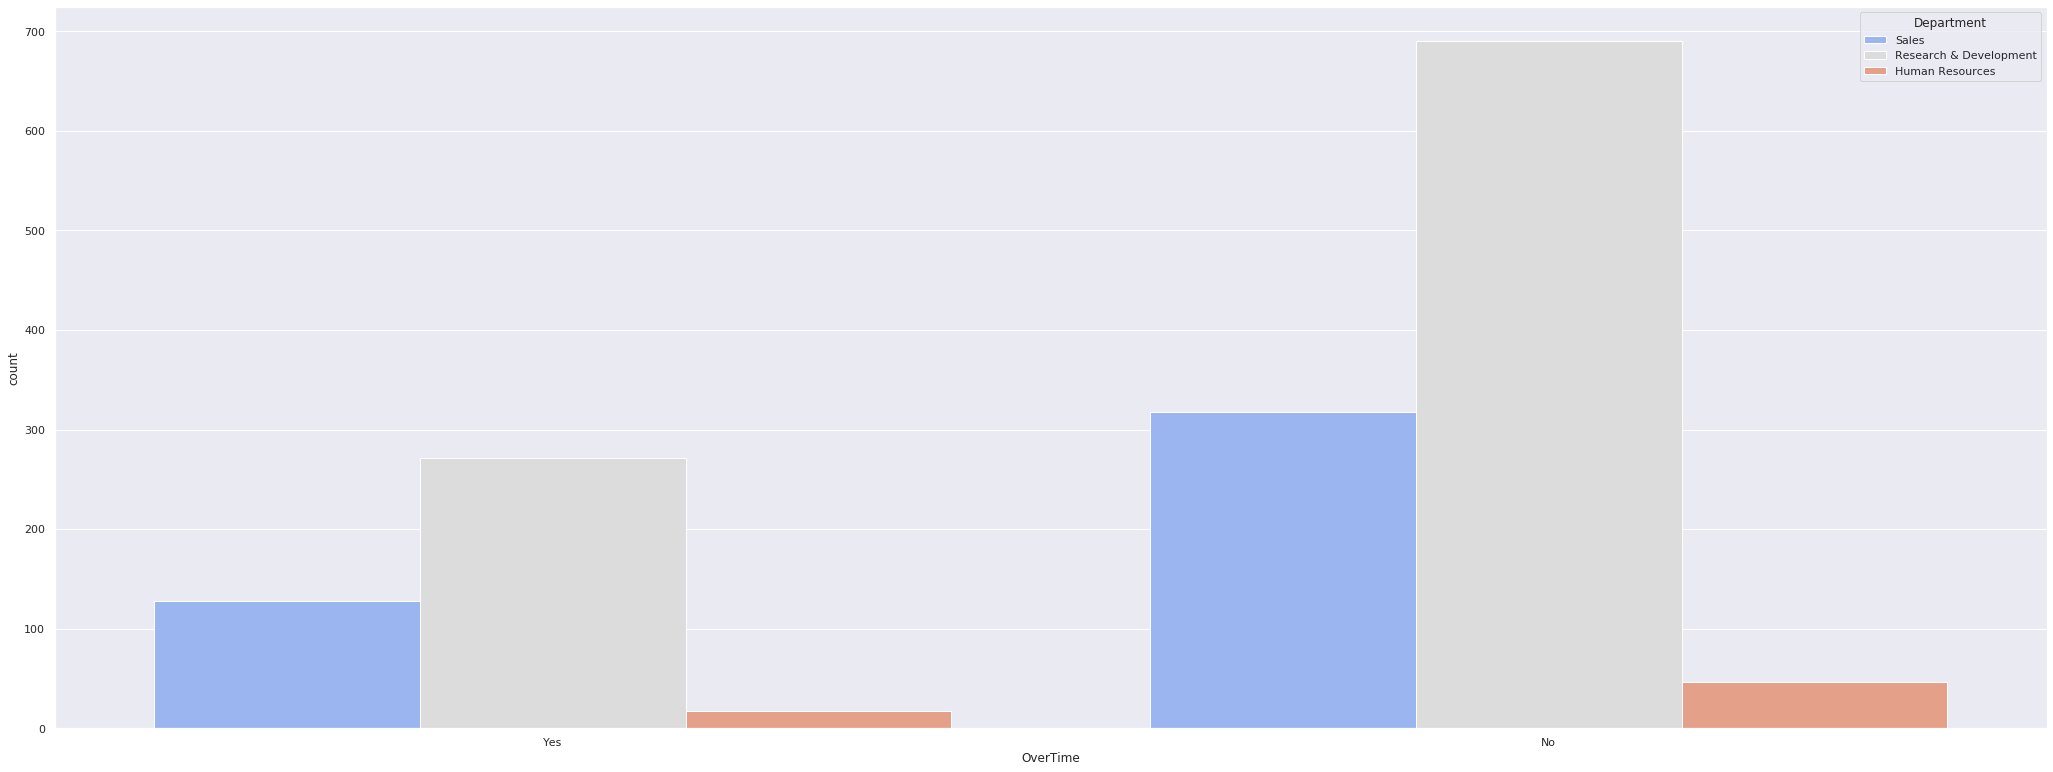

In [35]:
#OverTime  
sns.countplot(x='OverTime',hue='Department',data=df,palette='coolwarm')

We can notice and check that R&D has more employees impenitenced than another 2 groups.


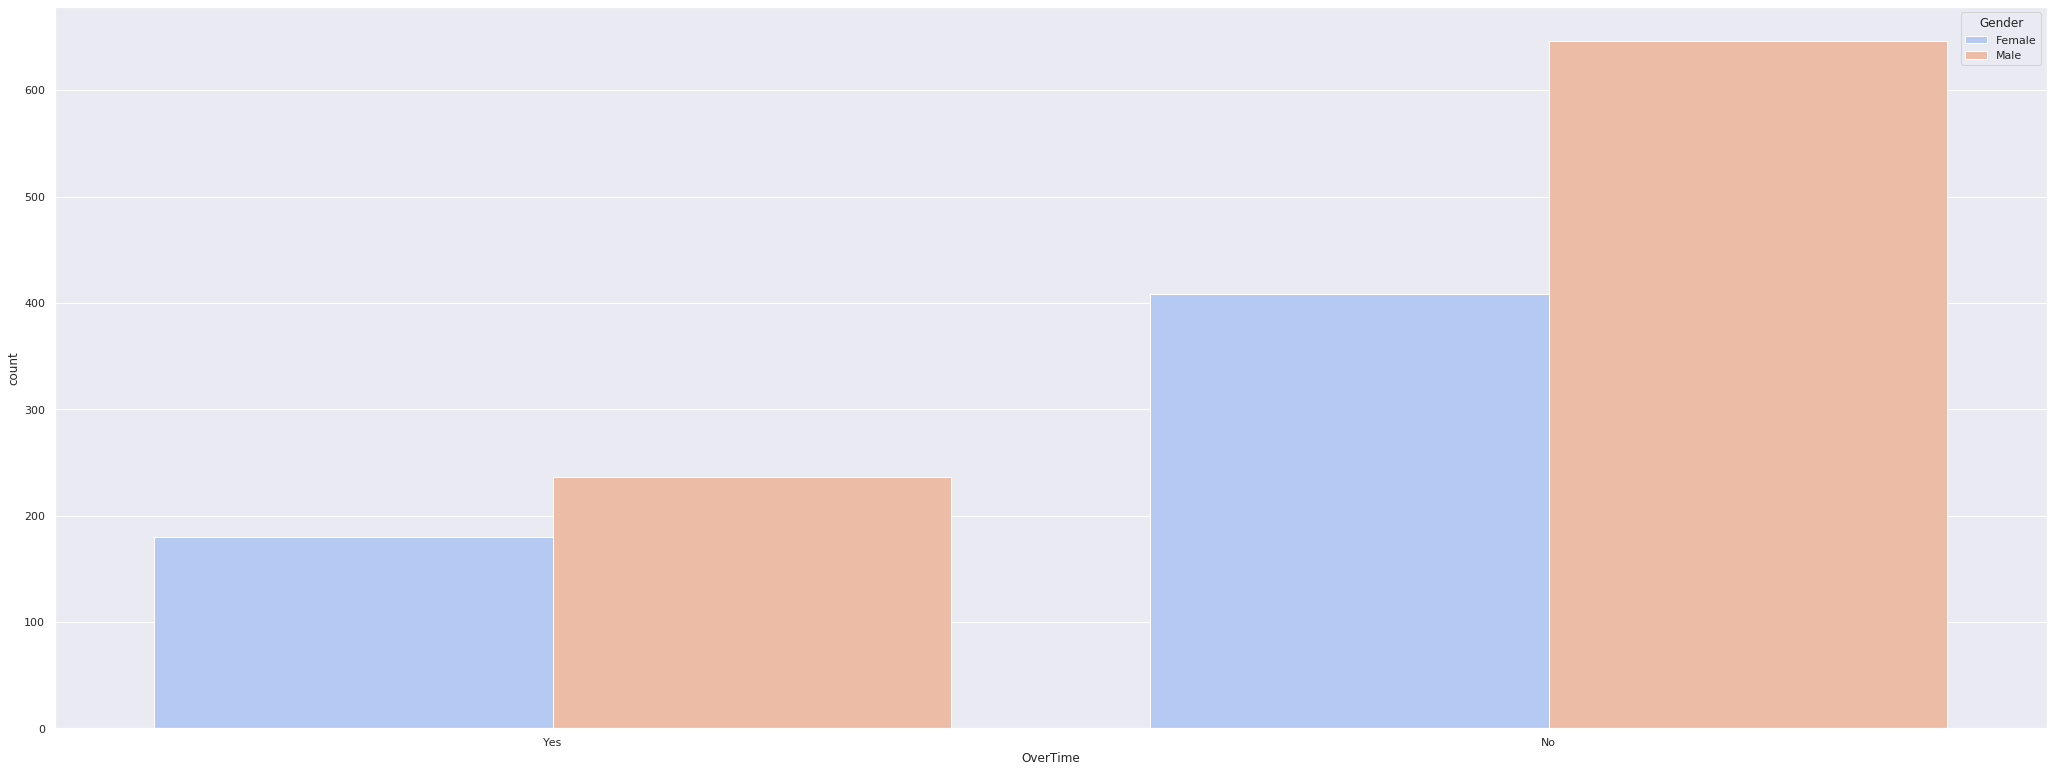

In [36]:
sns.countplot(x='OverTime',hue='Gender',data=df,palette='coolwarm')

If we check Overtime by gender, we see that impenitenced employees are more likely to be Man than Female. And that we have more impenitenced employees in Overtime. 

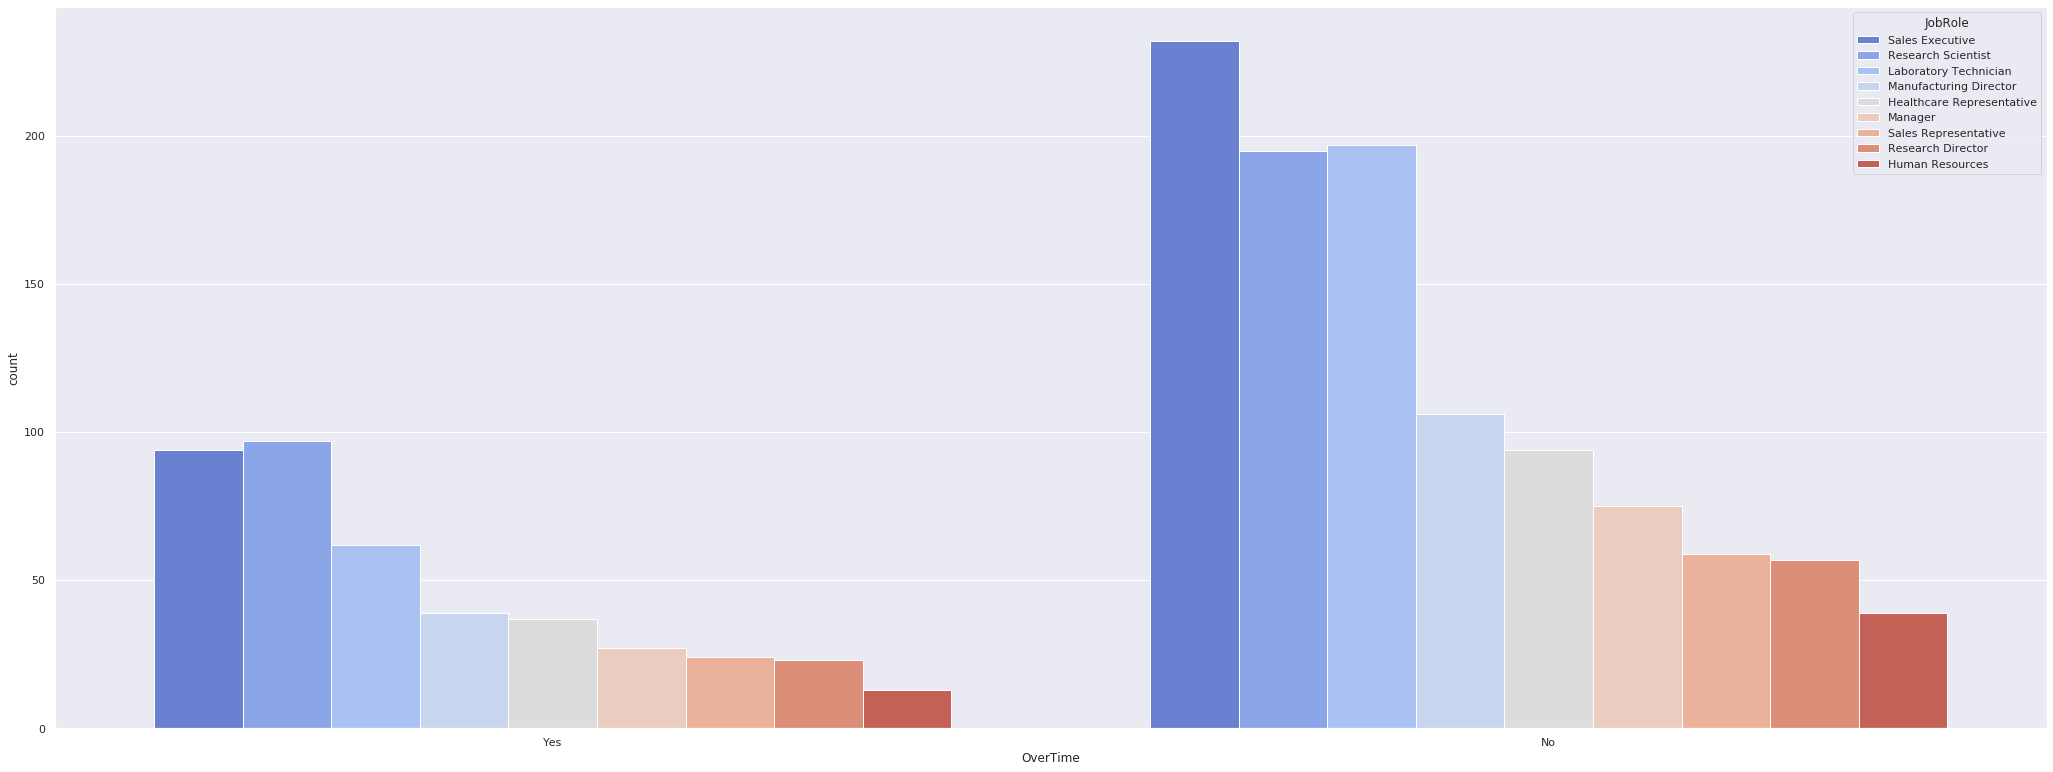

In [37]:
sns.countplot(x='OverTime',hue='JobRole',data=df,palette='coolwarm')

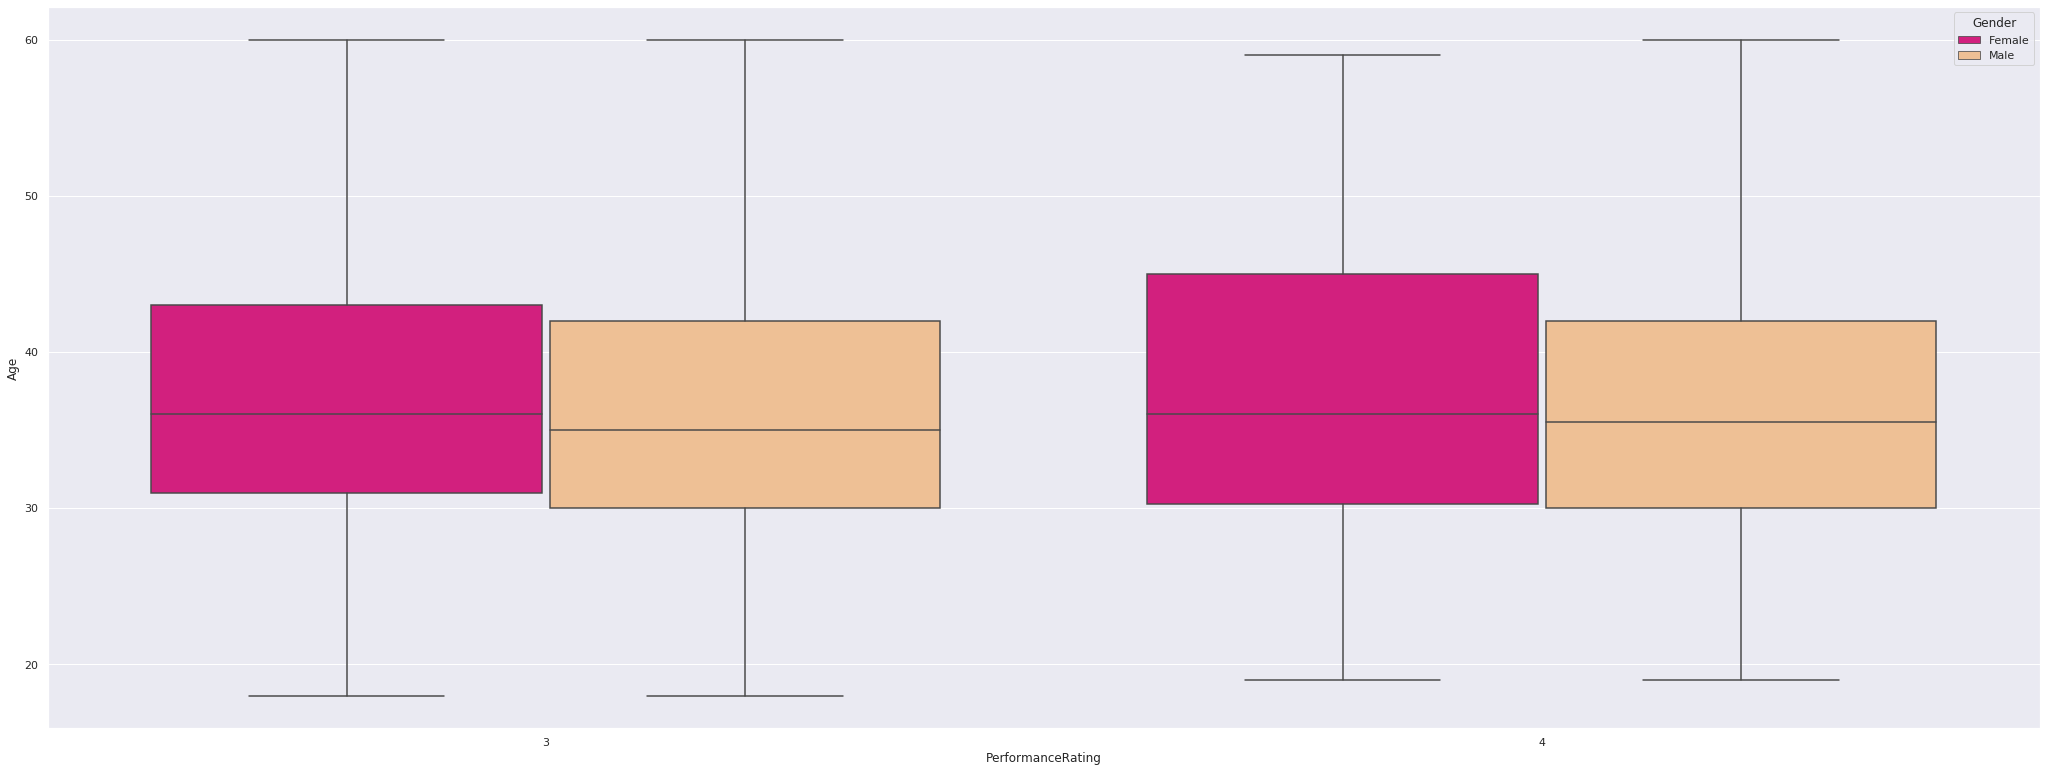

In [38]:
ax = sns.boxplot(x="PerformanceRating", y="Age", hue="Gender",data=df, palette="Accent_r")

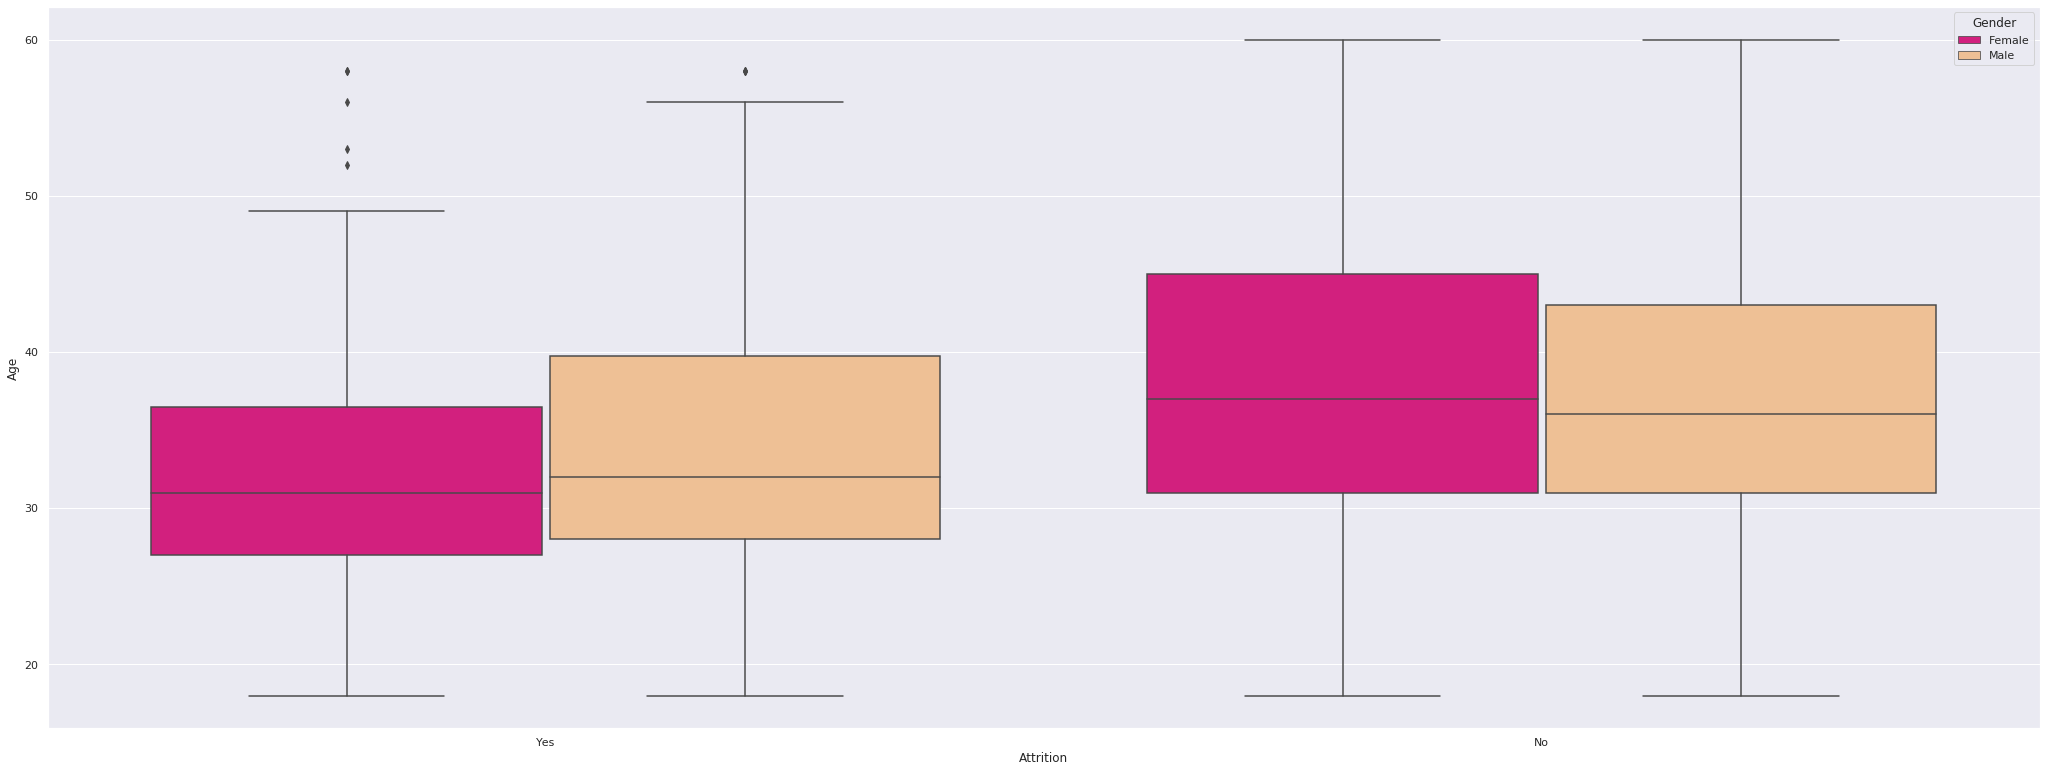

In [39]:
ax = sns.boxplot(x="Attrition", y="Age", hue="Gender",data=df, palette="Accent_r")

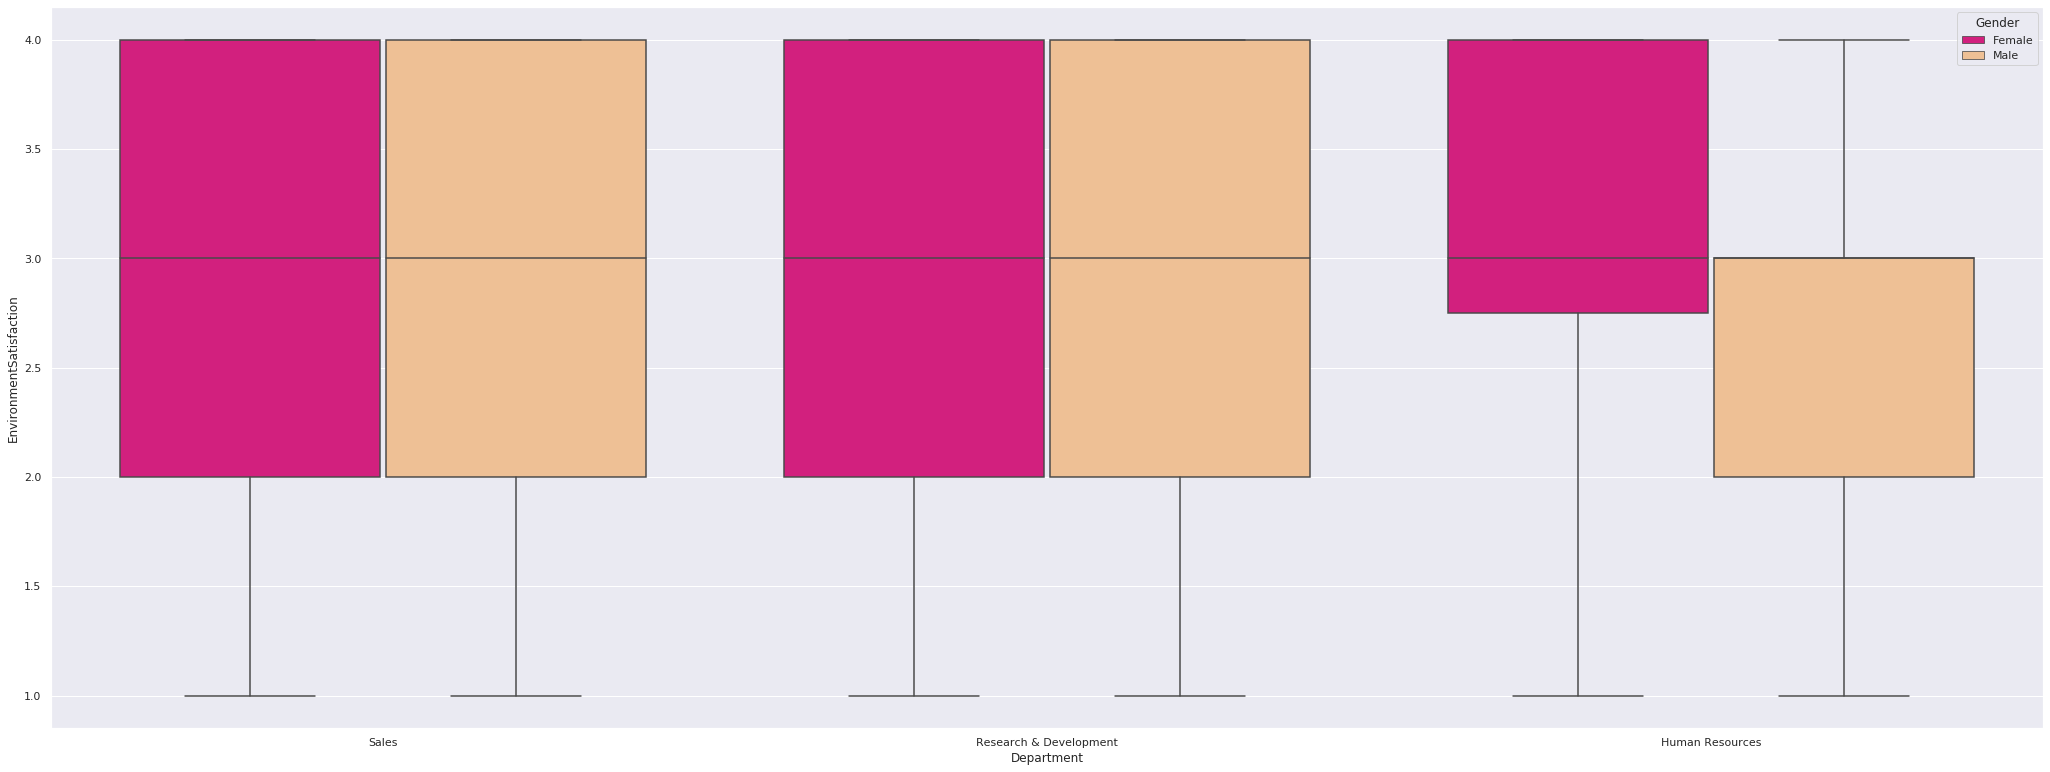

In [40]:
ax = sns.boxplot(x="Department", y="EnvironmentSatisfaction", hue="Gender",data=df, palette="Accent_r")

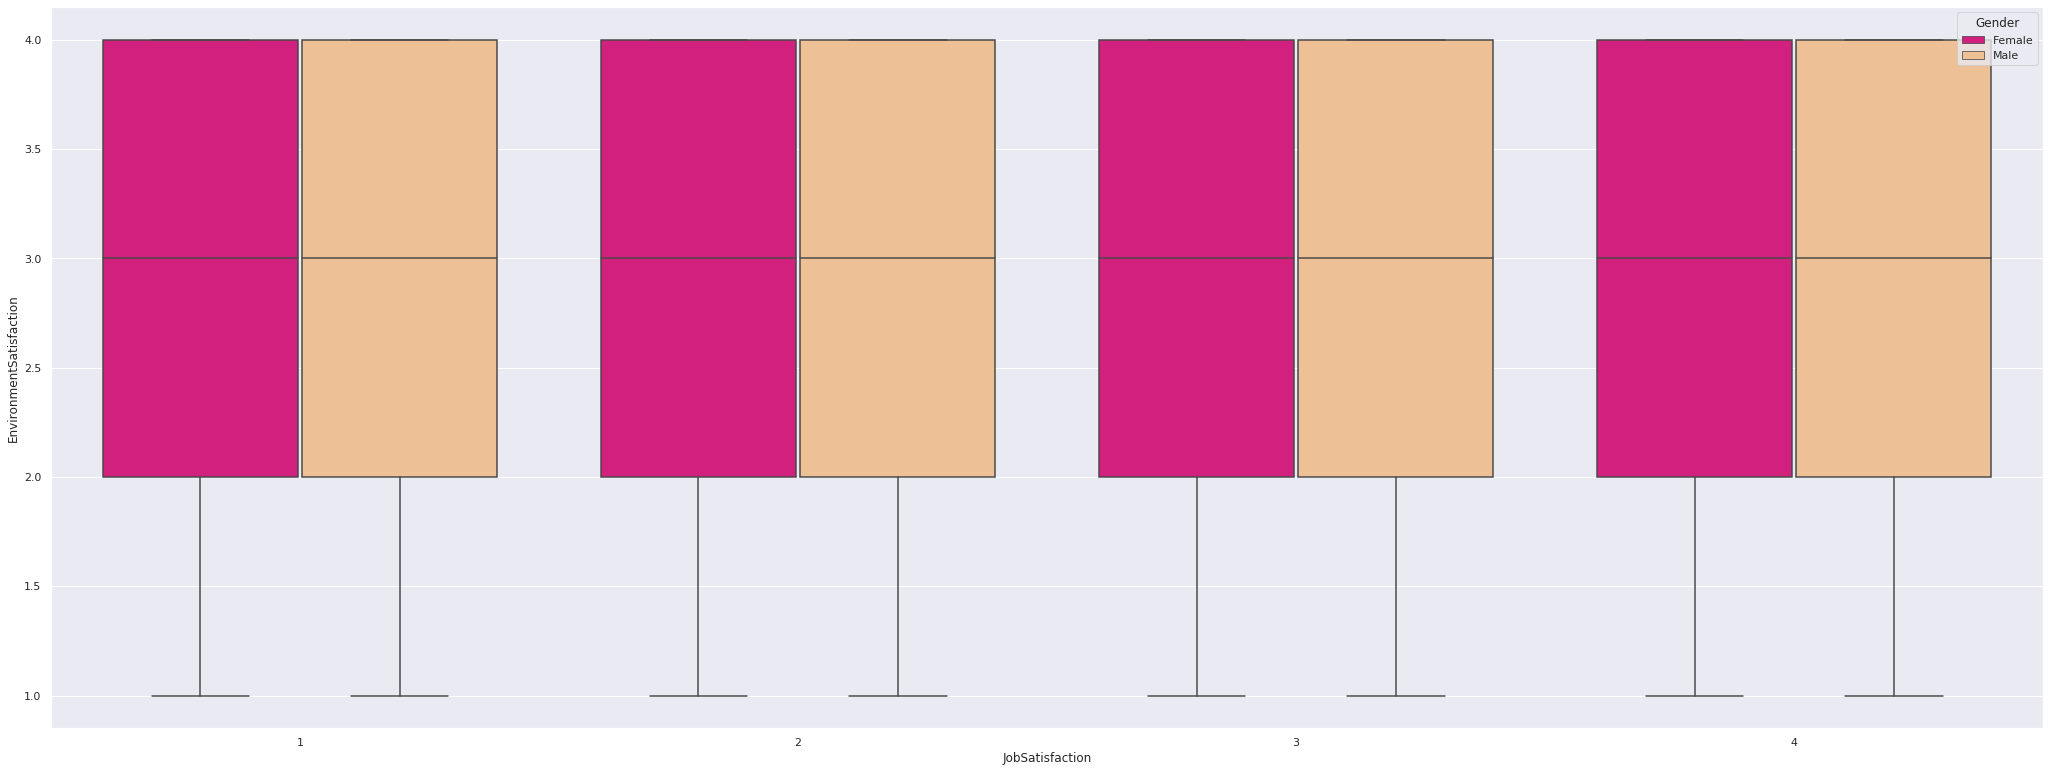

In [41]:
ax = sns.boxplot(x="JobSatisfaction", y="EnvironmentSatisfaction", hue="Gender",data=df, palette="Accent_r")

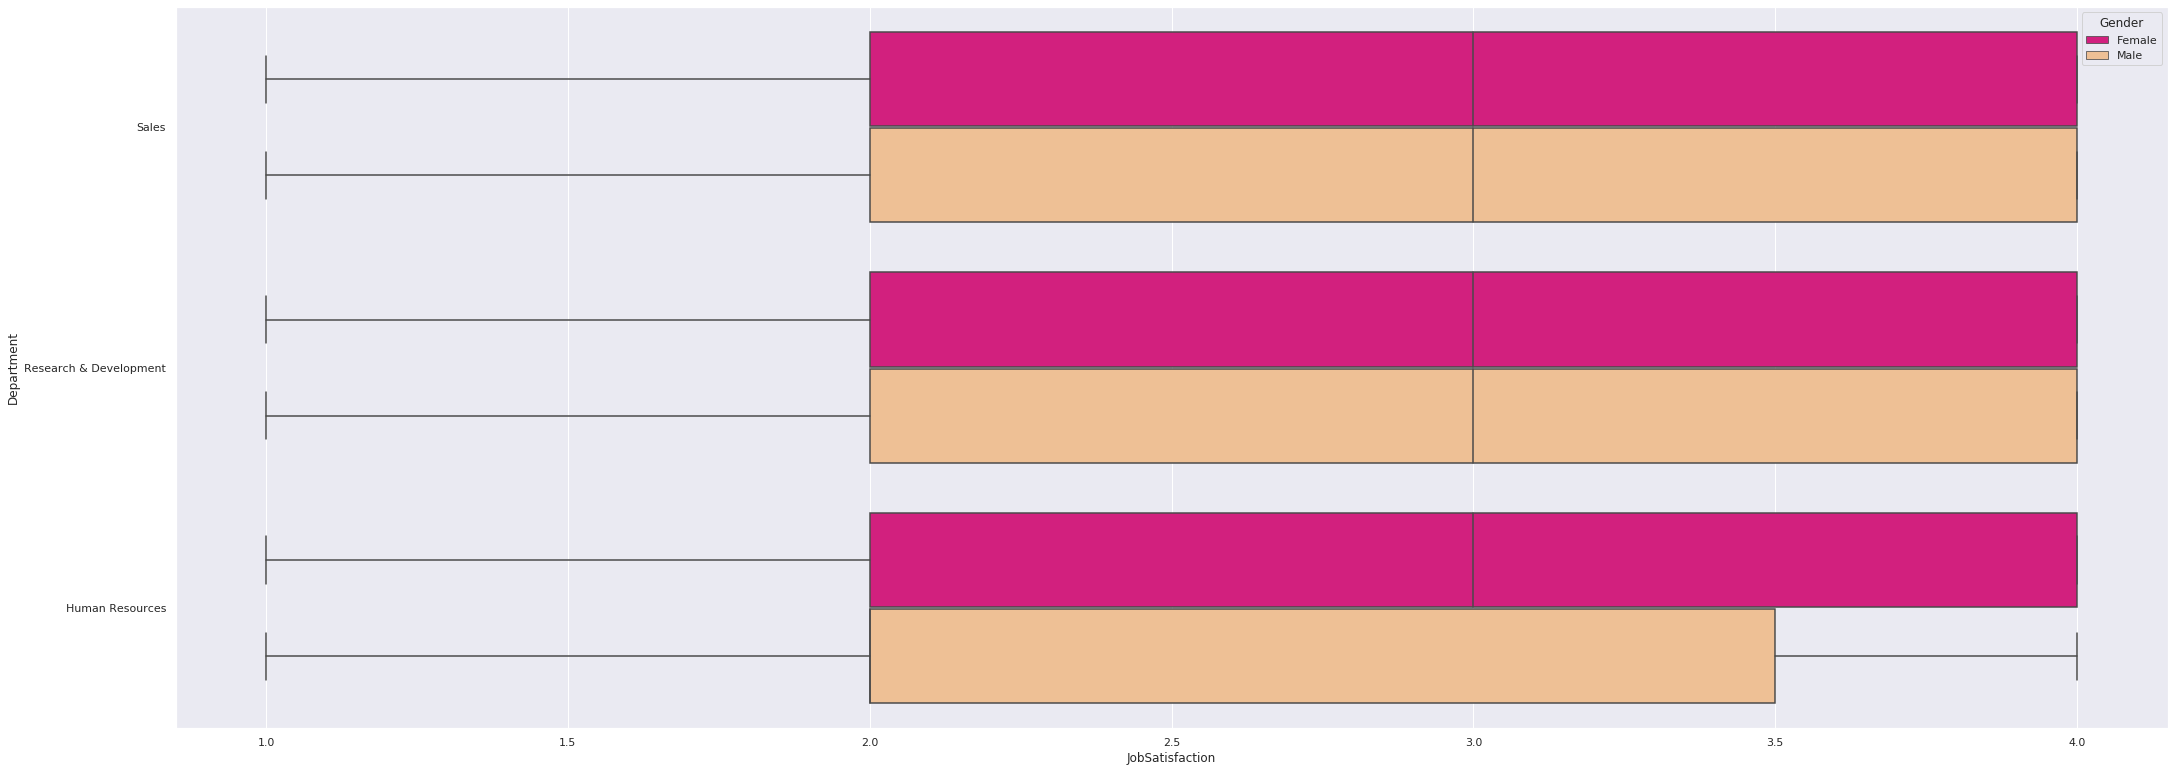

In [42]:
ax = sns.boxplot(x="JobSatisfaction", y="Department", hue="Gender",data=df, palette="Accent_r")

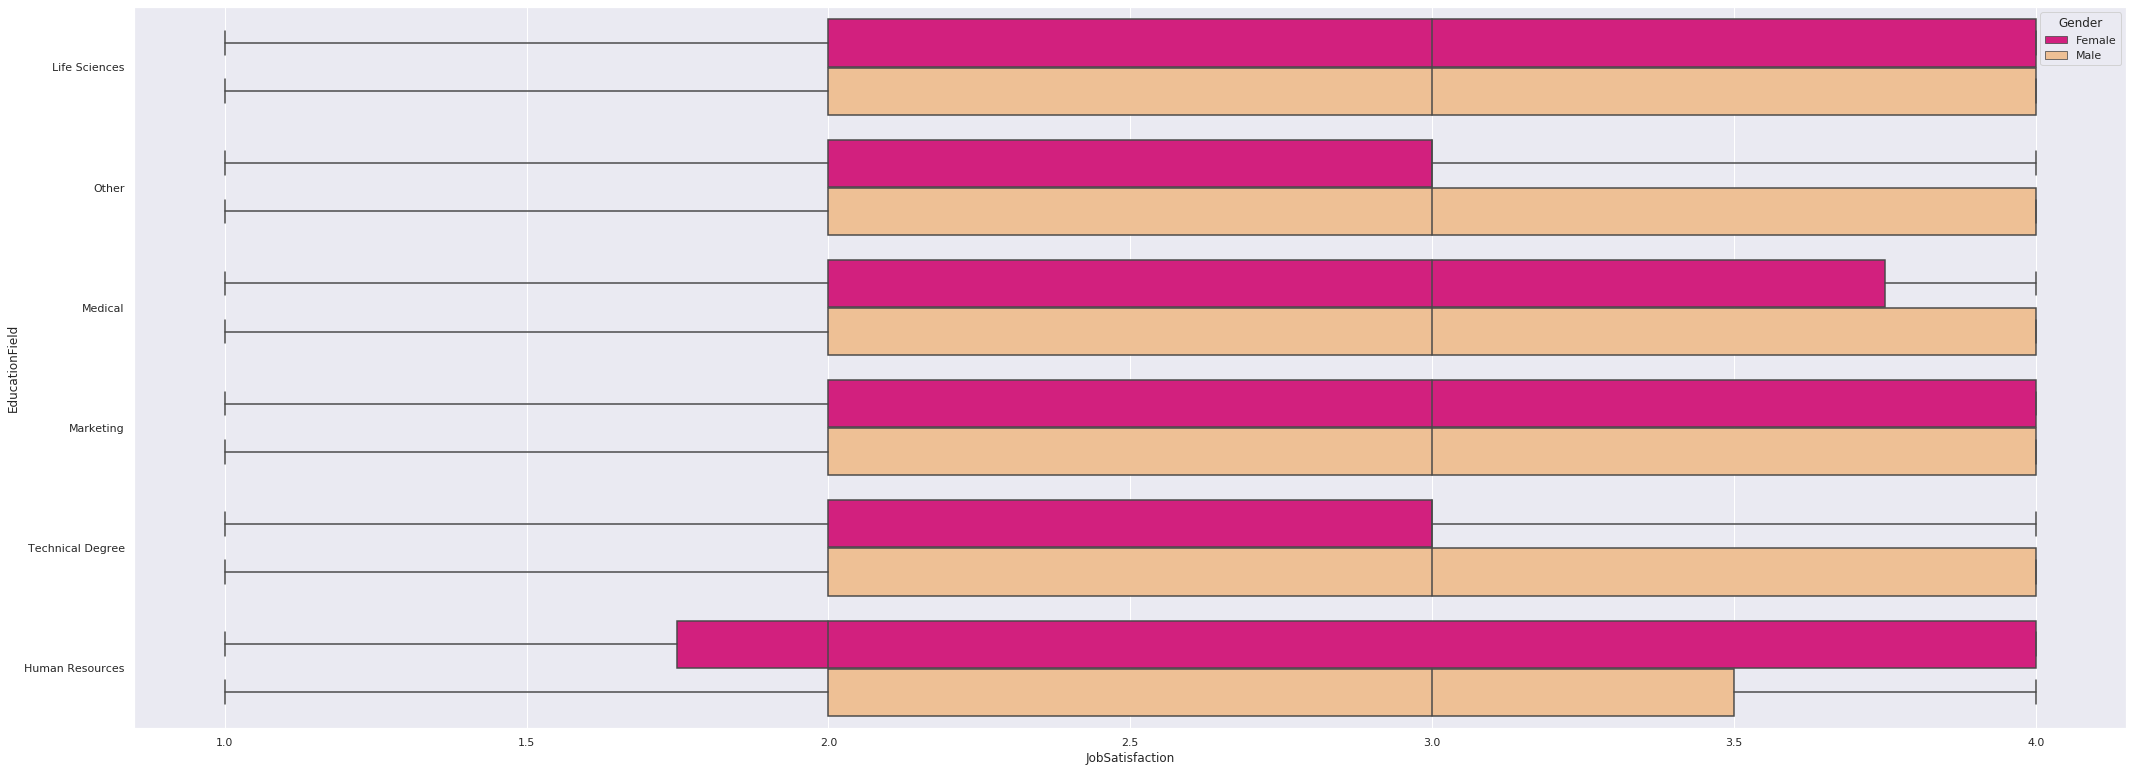

In [43]:
ax = sns.boxplot(x="JobSatisfaction", y="EducationField", hue="Gender",data=df, palette="Accent_r")

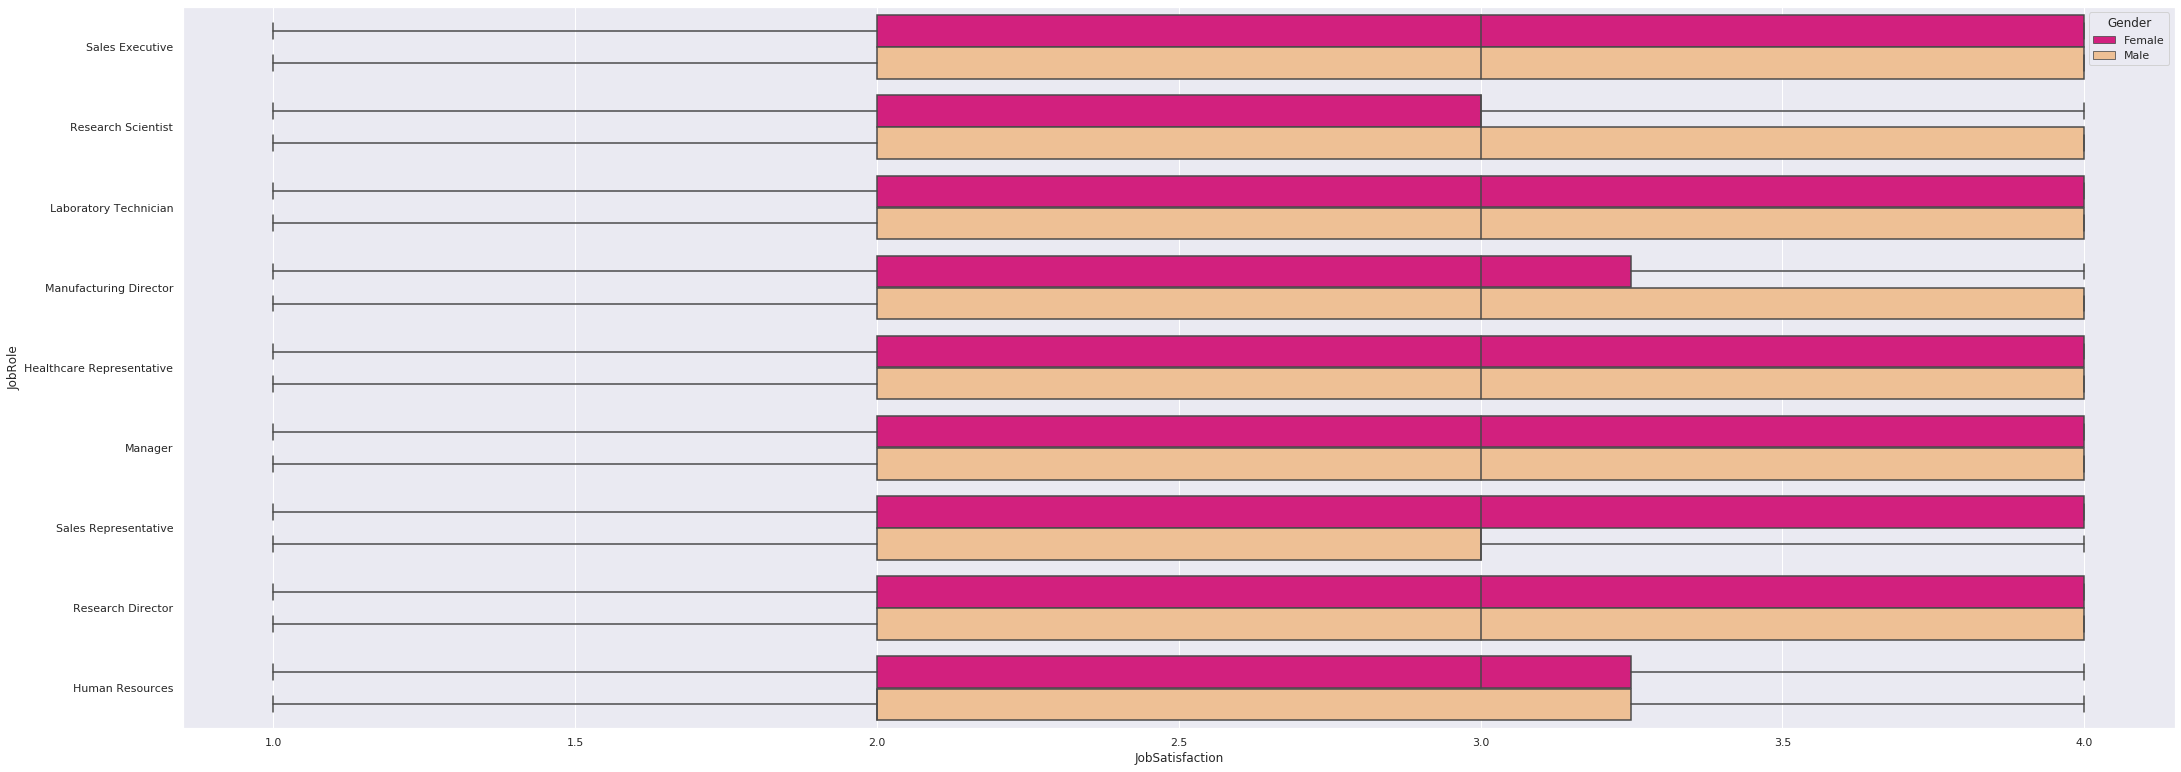

In [44]:
ax = sns.boxplot(x="JobSatisfaction", y="JobRole", hue="Gender",data=df, palette="Accent_r")

In all these above boxplots, we can see that we have normal, nothing special data in the boxplotss above.

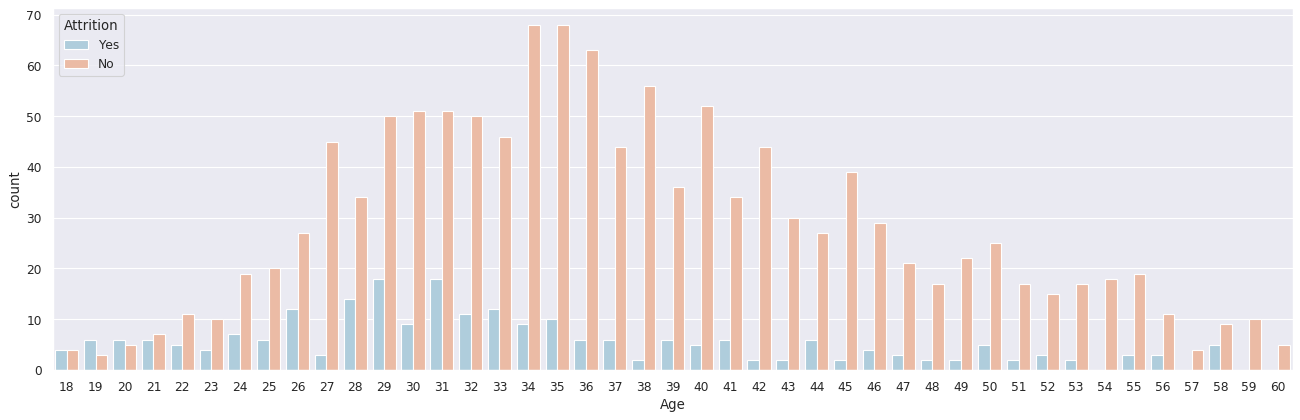

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.countplot(x='Age',hue='Attrition',data=df,palette='RdBu_r')

What’s interesting here is that you can see the age with the highest count of employee attrition are ages 28,29 and 31. The age with the highest retention is age 34, 35 and 36.

In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [47]:
!pip install plotly

In [48]:
# store the categorical data
categ_col = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categ_col.append(col)

# Store the numerical columns
num_col = df.columns.difference(categ_col)

print("Nº numerical columns are ",len(num_col))
print("Nº categorical columns are ",len(categ_col))

Nº numerical columns are  26
Nº categorical columns are  9


In [49]:
cat = df[categ_col]
cat = cat.drop(['Attrition'], axis=1) # Dropping the target column
cat = pd.get_dummies(cat,drop_first=True)

num = df[num_col]
df_final = pd.concat([num, cat], axis=1)
df_final.head(3)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                                0            0                        0   
1                                0            1                        0   
2                                0            1                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0     

In [50]:
## Encoding the Target column
df['Attrition_encod']=df[['Attrition']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [51]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [52]:
#Print all of the object data types and their unique values
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' )
        print(df[col].value_counts())
        print("________________________________________")

Attrition : 
No     1233
Yes     237
Name: Attrition, dtype: int64
________________________________________
BusinessTravel : 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
________________________________________
Department : 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
________________________________________
EducationField : 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
________________________________________
Gender : 
Male      882
Female    588
Name: Gender, dtype: int64
________________________________________
JobRole : 
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                 

In [53]:
#Print all of the number data types and their unique values
for col in df.columns:
    if df[col].dtype == 'int64':
        print(str(col) + ' : ' )
        print(df[col].unique())
        print("________________________________________")

Age : 
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
________________________________________
DailyRate : 
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452 

In [54]:
#Print all columns with single unique value so that we can drop it as it is not useful for our training
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(str(col) )
        print("________________________________________")

EmployeeCount
________________________________________
Over18
________________________________________
StandardHours
________________________________________


The StandardHours , Over18 & EmployeeCount columns contain just one single value in all rows, so these columns would not add any additional information to the model. We will remove these columns from the data set.

Some columns are useless for our training. For example, the assigment number as this is identification number. 

In [55]:
#Remove unneeded columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

Get the correlation of the columns.


In [56]:
#Get the correlation of the columns
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
Attrition_encod          -0.159205  -0.056652          0.077924  -0.031373   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   
Attrition_encod                         -0.103369   -0.006846       -0.130016   

                          JobLevel  JobSatisfaction  M

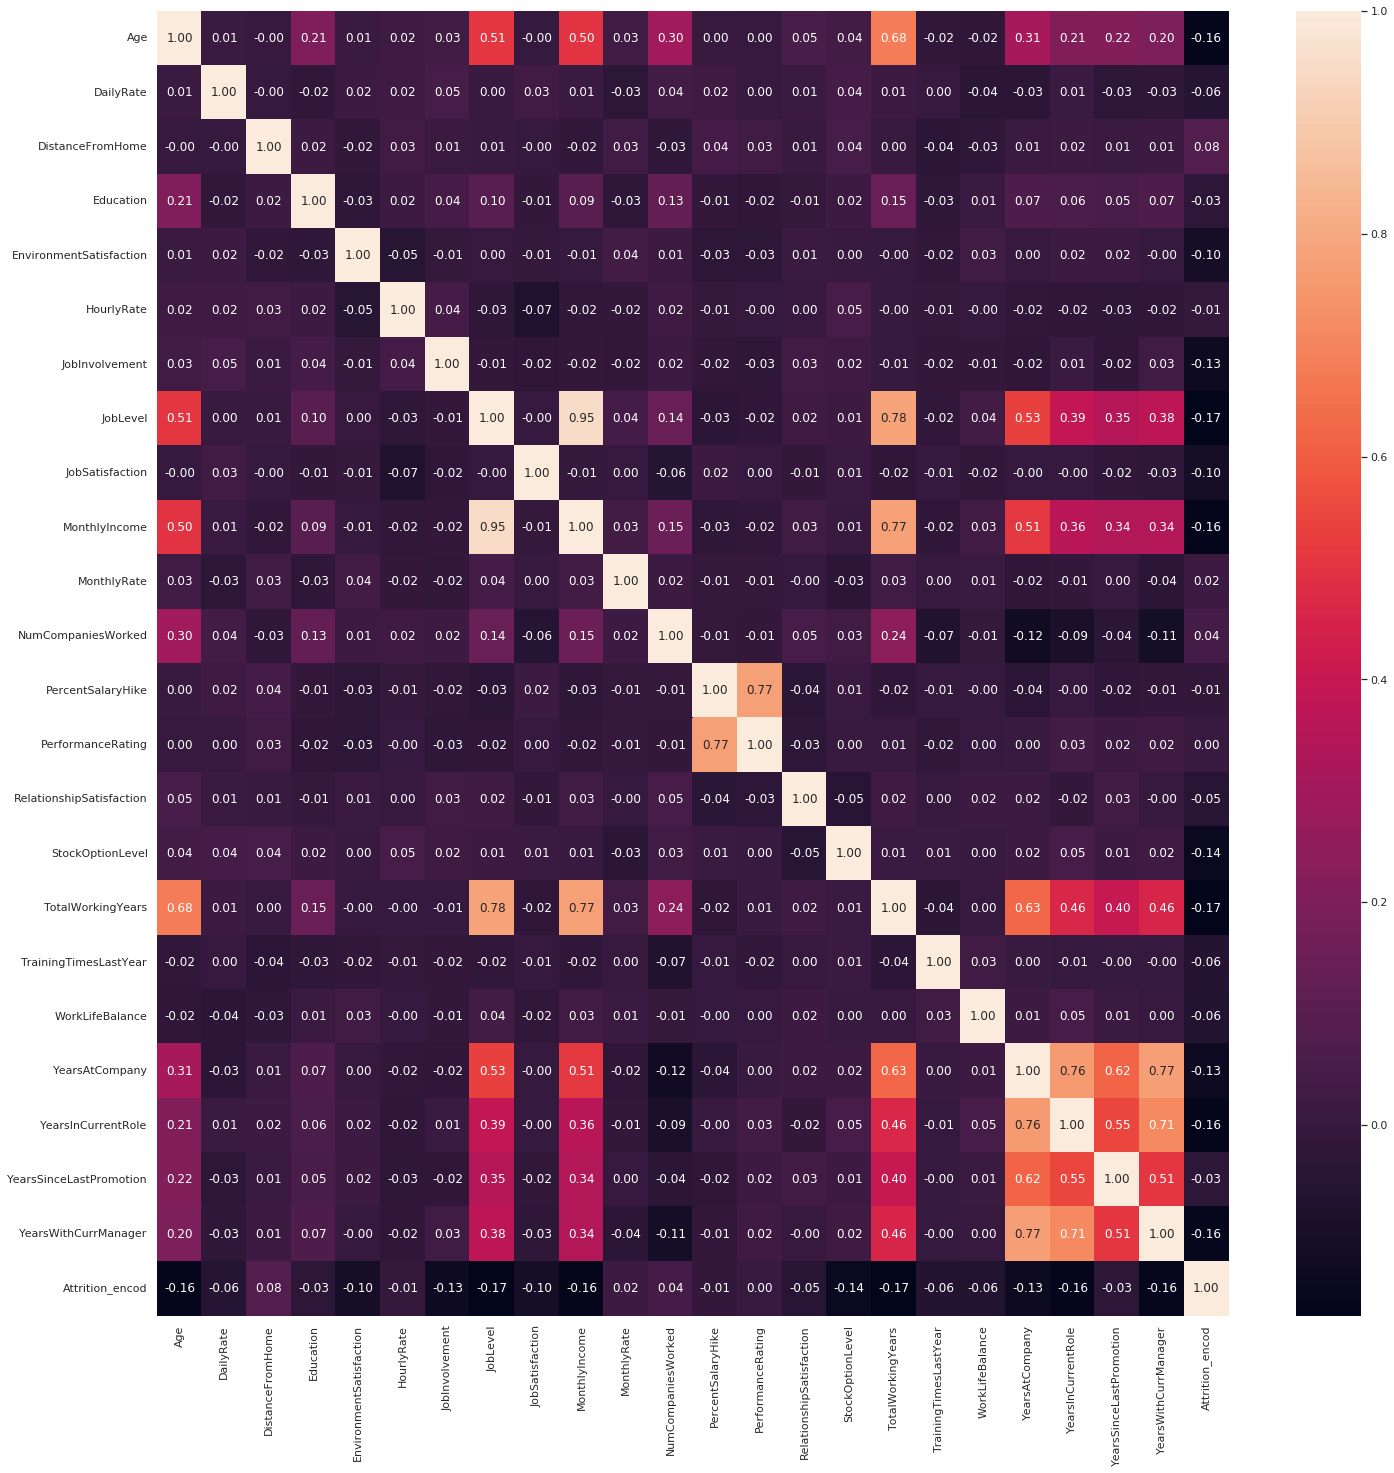

In [57]:
#Get the correlation of the columns
df.corr()
#Visualize the correlation
plt.figure(figsize=(24,24))  
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In above Heatmap or corelation map tells how the features are linked to the other features. 

If we check our target column, we see the features most correlated with it are JobLevel, MonthlyIncome,TotalworkingYears,YearsinCurrentRole and YearsWithCurrManager.

We also can highlight that Monthly Income has high correlation with JobLevel.

And total working years is correlated the most with Job Level and MonthlyIncome.

The performance rating is also very correlated (not that highly, but, yes) with PercentSalaryHike.


In [58]:
#Now let’s prepare the data for the model. 
#Transform categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
        if df[col].dtype == object:
            df[col] = LabelEncoder().fit_transform(df[col])

In [59]:
pd.set_option('display.max_columns', None)
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition_encod  
0                        0                     5                1  
1                        1                     7                0  
2                        0                     0                1  
3                        3                     0                0  
4                        2                     2                0

We will tranfer the Age column towards the end of the dataframe in order to have the target in first column.

In [60]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2       1102           2                 1   
1             0               1        279           1                 8   
2             1               2       1373           1                 2   
3             0               1       1392           1                 3   
4             0               2        591           1                 2   
5             0               1       1005           1                 2   
6             0               2       1324           1                 3   
7             0               2       1358           1                24   
8             0               1        216           1                23   
9             0               2       1299           1                27   
10            0               2        809           1                16   
11            0               2        153           1                15   
12            0               2        670           1                26   
13            0               2       1346           1                19   
14            1               2        103           1                24   
15            0               2       1389           1                21   
16            0               2        334           1                 5   
17            0               0       1123           1                16   
18            0               2       1219           2                 2   
19            0               2        371           1                 2   
20            0               0        673           1                11   
21            1               2       1218           2                 9   
22            0               2        419           1                 7   
23            0               2        391           1                15   
24            1               2        699           1                 6   
25            0               2       1282           1                 5   
26            1               1       1125           1                16   
27            0               2        691           2                 8   
28            0               2        477           1                 7   
29            0               2        705           2                 2   
30            0               2        924           1                 2   
31            0               2       1459           1                10   
32            0               2        125           1                 9   
33            1               2        895           2                 5   
34            1               2        813           1                 1   
35            0               2       1273           1                 2   
36            1               2        869           2                 3   
37            0               2        890           2                 2   
38            0               2        852           1                 5   
39            0               1       1141           2                 1   
40            0               2        464           1                 4   
41            0               2       1240           1                 2   
42            1               2       1357           1                25   
43            0               1        994           2                 8   
44            0               1        721           1                 1   
45            1               2       1360           1                12   
46            0               0       1065           2                23   
47            0               2        408           1                19   
48            0               1       1211           2                 5   
49            0               2       1229           1                 8   
50            1               2        626           1                 1   
51            1               2       1434           1

In [61]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [62]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [63]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [64]:
#Now get the accuracy of the model on the training set.
forest.score(X_train, Y_train)

1.0

In [65]:
#Show the confusion matrix and accuracy for  the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
#The model correctly identified 86.41% of the employees that left the company.

[[310   0]
 [  0  58]]
Model Testing Accuracy = "1.0!"



The model correctly identified 100% of the employees that left the company.
Let’s check the model and analyse the important features.

In [66]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                             
Attrition_encod                0.661
TotalWorkingYears              0.031
YearsWithCurrManager           0.028
MonthlyIncome                  0.024
DailyRate                      0.022
HourlyRate                     0.020
DistanceFromHome               0.017
OverTime                       0.016
Age_Years                      0.015
YearsAtCompany                 0.015
YearsSinceLastPromotion        0.014
MonthlyRate                    0.014
JobRole                        0.014
NumCompaniesWorked             0.013
PercentSalaryHike              0.013
WorkLifeBalance                0.009
YearsInCurrentRole             0.009
JobSatisfaction                0.008
EducationField                 0.008
RelationshipSatisfaction       0.008
JobLevel                       0.007
JobInvolvement                 0.007
EnvironmentSatisfaction        0.007
StockOptionLevel               0.005
TrainingTimesLastYear          0.004
Education                      0.004
Department                     0.003
MaritalStatus                  0.002
BusinessTravel                 0.002
Gender                         0.001
PerformanceRating              0.001

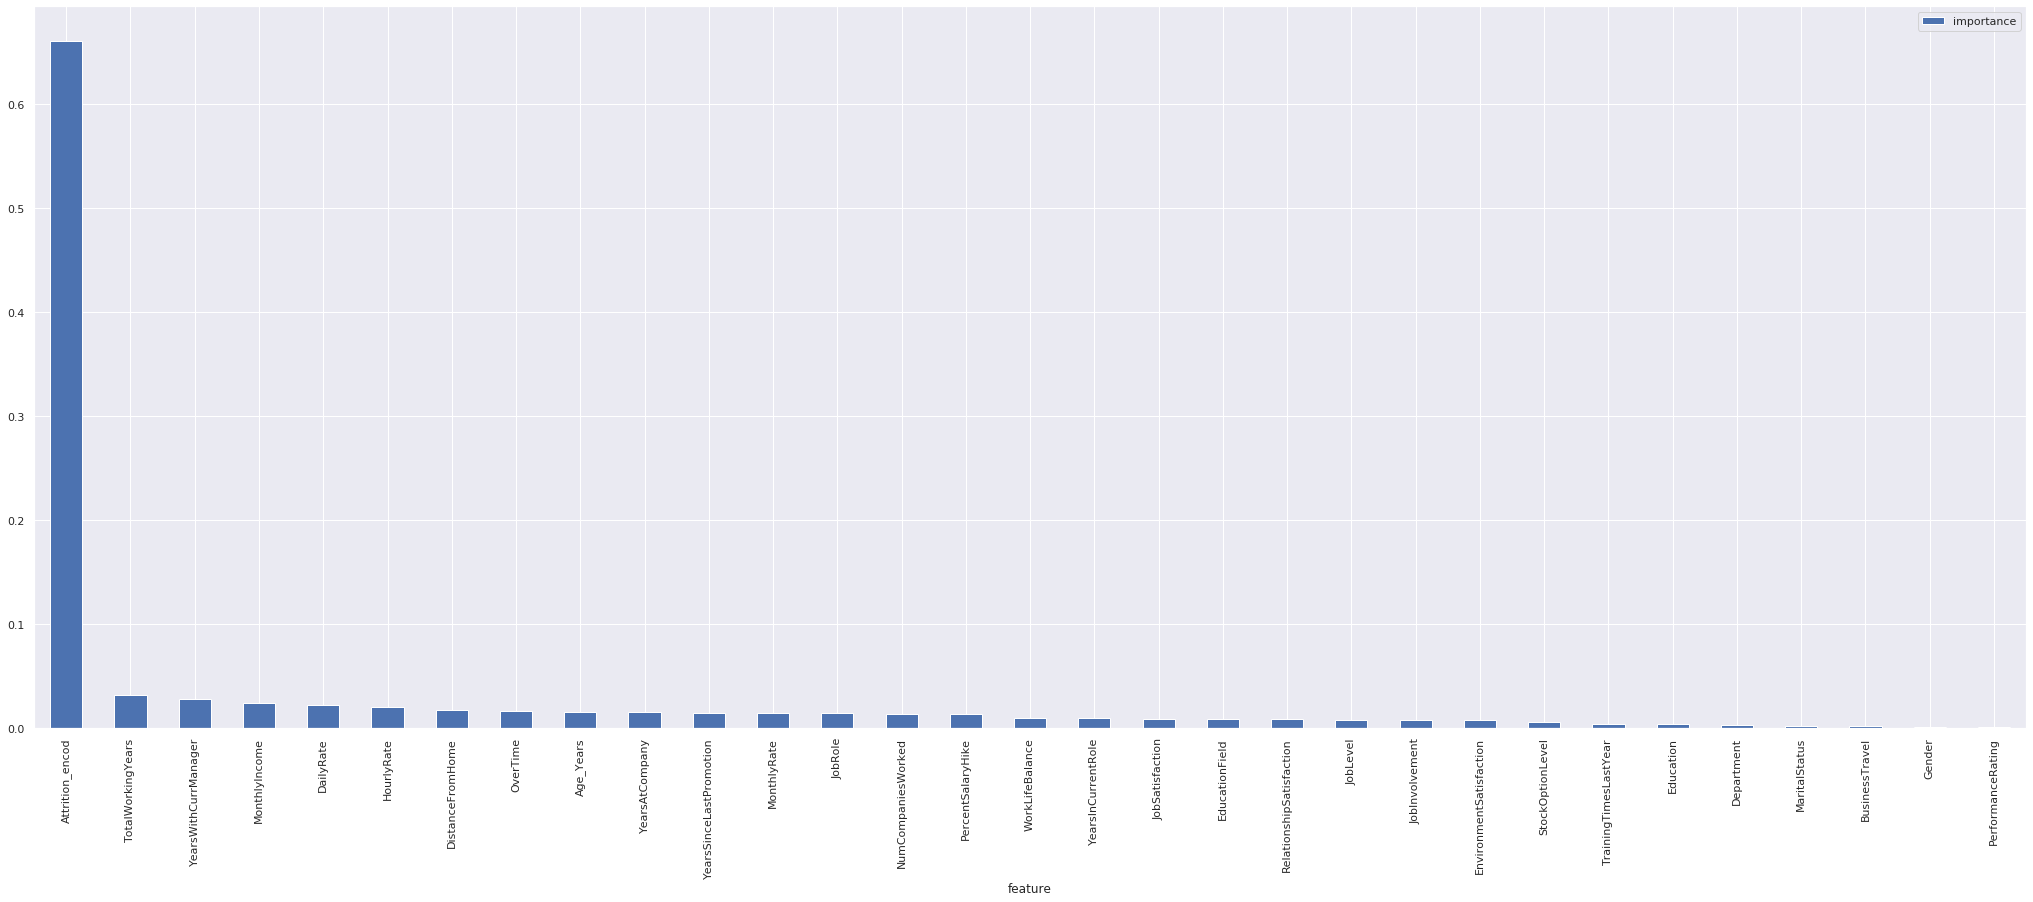

In [67]:
#Visualize the importance
importances.plot.bar()

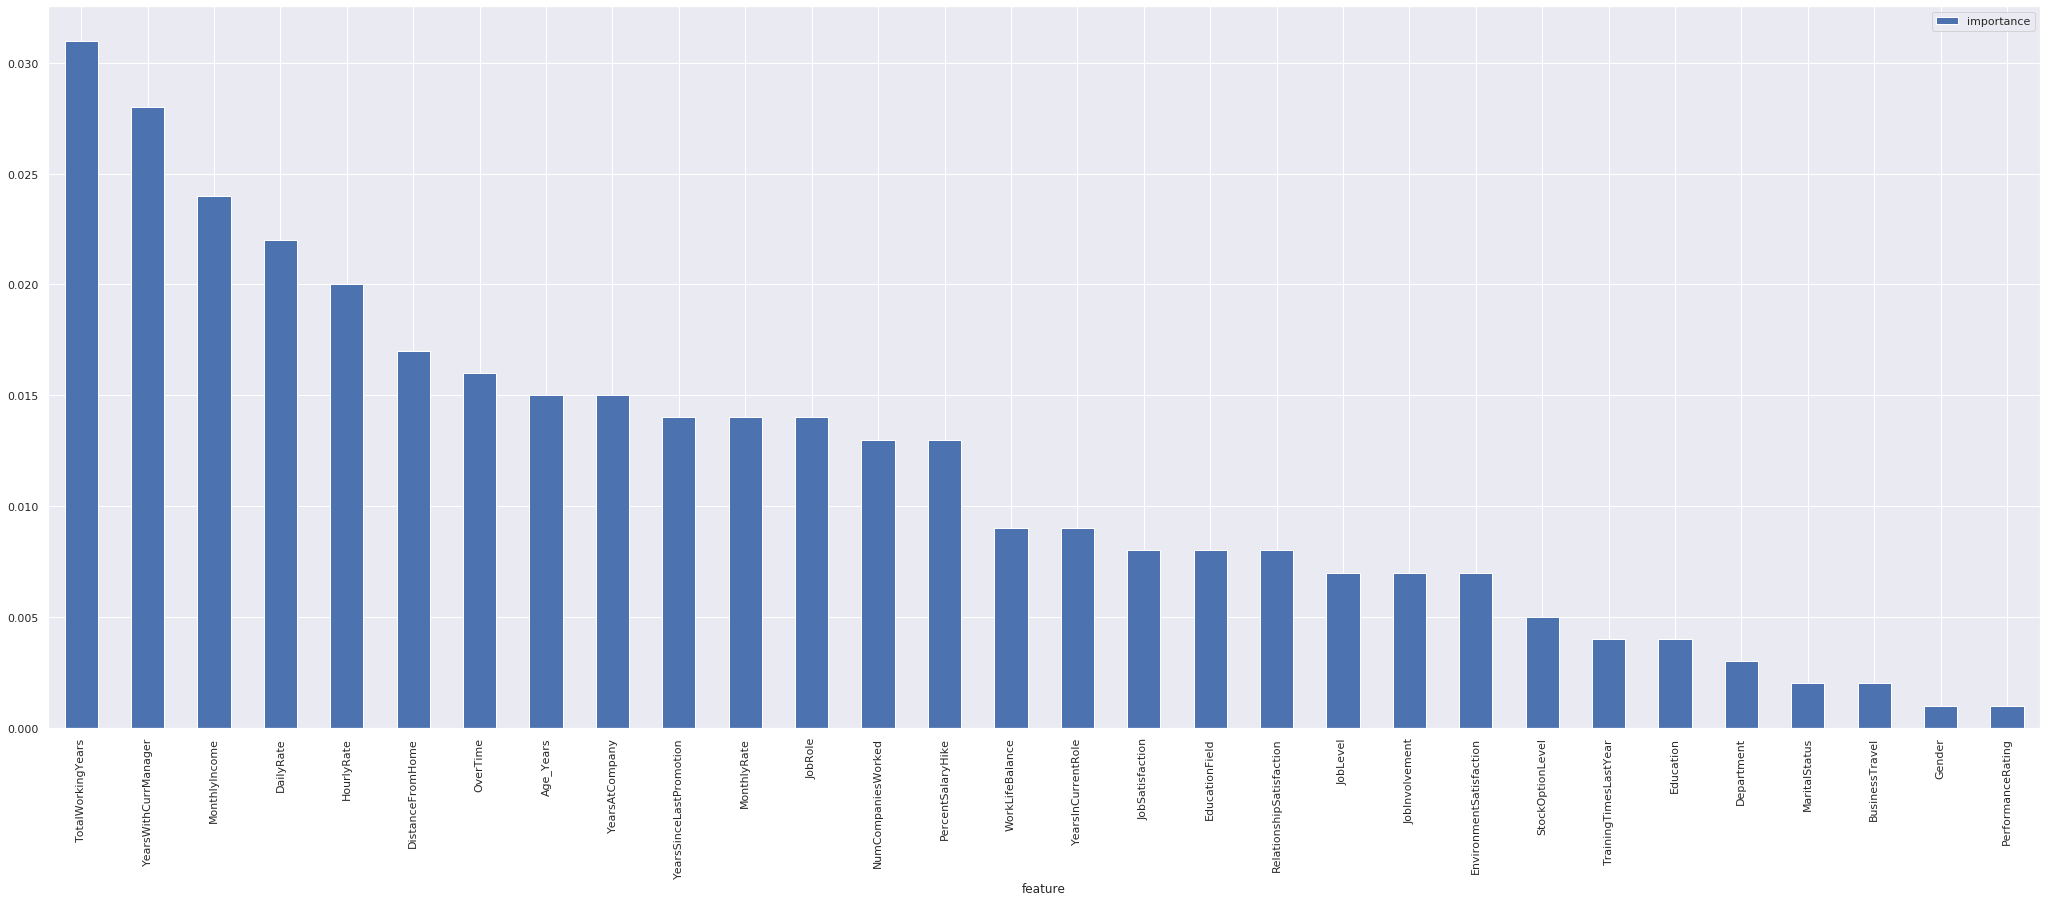

In [68]:
#Visualize the importance
imp=importances.drop('Attrition_encod',axis=0)
imp.plot.bar()

Total Working Years appears to be the most important feature followed by the Years with current Manager, Monthly Income, and Daily rate. 

In [69]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
Y_train

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [70]:
#Y_train.value_counts()

import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 923, 1: 179}

We still have imbalanceed data where the percentage of peoplewho stayes in the organisation is more than the percentage of the employee leaving the organisation

In [71]:
!pip install imblearn


In [72]:
!pip install imbalanced-learn

In [73]:
# we will use SMOTE technique to Balance out the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [74]:
# After balancing the data here it is, let's check it.

import numpy as np
unique, counts = np.unique(X_train_res, return_counts=True)
dict(zip(unique, counts))
#(y_train_res.value_counts()/len(y_train_res.index))*100

{0: 7130,
 1: 11515,
 2: 8955,
 3: 8530,
 4: 3269,
 5: 1215,
 6: 1057,
 7: 1282,
 8: 645,
 9: 540,
 10: 433,
 11: 480,
 12: 415,
 13: 408,
 14: 349,
 15: 259,
 16: 194,
 17: 206,
 18: 185,
 19: 163,
 20: 164,
 21: 165,
 22: 144,
 23: 99,
 24: 101,
 25: 87,
 26: 119,
 27: 85,
 28: 131,
 29: 137,
 30: 122,
 31: 116,
 32: 128,
 33: 109,
 34: 102,
 35: 118,
 36: 107,
 37: 78,
 38: 85,
 39: 72,
 40: 84,
 41: 71,
 42: 84,
 43: 62,
 44: 66,
 45: 72,
 46: 66,
 47: 55,
 48: 52,
 49: 52,
 50: 47,
 51: 43,
 52: 49,
 53: 37,
 54: 46,
 55: 49,
 56: 46,
 57: 41,
 58: 40,
 59: 41,
 60: 35,
 61: 28,
 62: 34,
 63: 31,
 64: 22,
 65: 42,
 66: 35,
 67: 24,
 68: 25,
 69: 30,
 70: 26,
 71: 33,
 72: 30,
 73: 27,
 74: 35,
 75: 28,
 76: 25,
 77: 27,
 78: 30,
 79: 33,
 80: 30,
 81: 35,
 82: 36,
 83: 28,
 84: 27,
 85: 27,
 86: 19,
 87: 30,
 88: 26,
 89: 20,
 90: 21,
 91: 22,
 92: 18,
 93: 19,
 94: 18,
 95: 20,
 96: 21,
 97: 18,
 98: 22,
 99: 13,
 100: 16,
 104: 1,
 105: 1,
 107: 1,
 109: 1,
 111: 2,
 113: 1,
 11

In [75]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_res, y_train_res)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, rf_predictions)))
print(classification_report(Y_test, rf_predictions))

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00        58

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [76]:
#!pip install chart-studio

In [77]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 24 kB/s s eta 0:00:01    |██████████████████▌             | 96.6 MB 72.6 MB/s eta 0:00:01     |███████████████████████████████▌| 164.4 MB 70.7 MB/s eta 0:00:01


In [78]:
import xgboost
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=1,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [79]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [80]:
classifier.fit(X_train_res, y_train_res)

[20:51:46] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [81]:
# now we'll check the training accuracy with cross-validation and k-fold methods.
# - cross validataion
scores = cross_val_score(classifier, X_train_res, y_train_res, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

cores = cross_val_score(classifier, X_train_res, y_train_res, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
#Mean cross-validation score: 0.94 
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(classifier, X_train_res, y_train_res, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#K-fold CV average score: 0.94 
ypred = classifier.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)

[20:51:46] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:46] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluatio

In [82]:
print("Accuracy score: {}".format(accuracy_score(Y_test, ypred)))

Accuracy score: 1.0


In [83]:
#Y_train.value_counts()

import numpy as np
unique, counts = np.unique(X_test, return_counts=True)
dict(zip(unique, counts))

{0: 1381,
 1: 1996,
 2: 1729,
 3: 1771,
 4: 832,
 5: 222,
 6: 191,
 7: 300,
 8: 155,
 9: 118,
 10: 128,
 11: 102,
 12: 66,
 13: 87,
 14: 81,
 15: 48,
 16: 43,
 17: 32,
 18: 52,
 19: 31,
 20: 45,
 21: 25,
 22: 32,
 23: 24,
 24: 24,
 25: 29,
 26: 19,
 27: 20,
 28: 17,
 29: 27,
 30: 15,
 31: 28,
 32: 27,
 33: 22,
 34: 32,
 35: 19,
 36: 21,
 37: 17,
 38: 19,
 39: 11,
 40: 17,
 41: 13,
 42: 15,
 43: 18,
 44: 10,
 45: 13,
 46: 14,
 47: 9,
 48: 11,
 49: 9,
 50: 15,
 51: 10,
 52: 10,
 53: 11,
 54: 14,
 55: 11,
 56: 8,
 57: 6,
 58: 9,
 59: 6,
 60: 9,
 61: 7,
 62: 7,
 63: 4,
 64: 7,
 65: 4,
 66: 7,
 67: 6,
 68: 5,
 69: 4,
 70: 4,
 71: 3,
 72: 10,
 73: 5,
 74: 4,
 75: 4,
 76: 6,
 77: 4,
 78: 3,
 79: 9,
 80: 4,
 81: 5,
 82: 5,
 83: 6,
 84: 7,
 85: 4,
 86: 9,
 87: 6,
 88: 7,
 89: 3,
 90: 6,
 91: 1,
 92: 11,
 93: 6,
 94: 7,
 95: 5,
 96: 9,
 97: 5,
 98: 9,
 99: 7,
 100: 3,
 102: 1,
 103: 1,
 106: 1,
 111: 1,
 119: 1,
 121: 1,
 135: 1,
 141: 1,
 142: 1,
 145: 1,
 147: 1,
 152: 1,
 155: 1,
 160: 1,
 16

In [84]:
tr=pd.isna(X_test)==True


In [85]:
classifier.fit(X_train_res,y_train_res)
prediction=classifier.predict(X_test)

[20:51:50] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:51:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))
print("="*80)
print(classification_report(Y_test, prediction))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00        58

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [87]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_res, y_train_res)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, rf_predictions)))
print("="*80)
print(classification_report(Y_test, rf_predictions))

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00        58

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [88]:
import xgboost
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=1,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [89]:
classifier.fit(X_train_res,y_train_res)
prediction=classifier.predict(X_test)

[20:51:52] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:51:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))
print("="*80)
print(classification_report(Y_test, prediction))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00        58

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [91]:
!pip install plotly

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import plotly.graph_objs as go
import plotly.offline as py

In [93]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

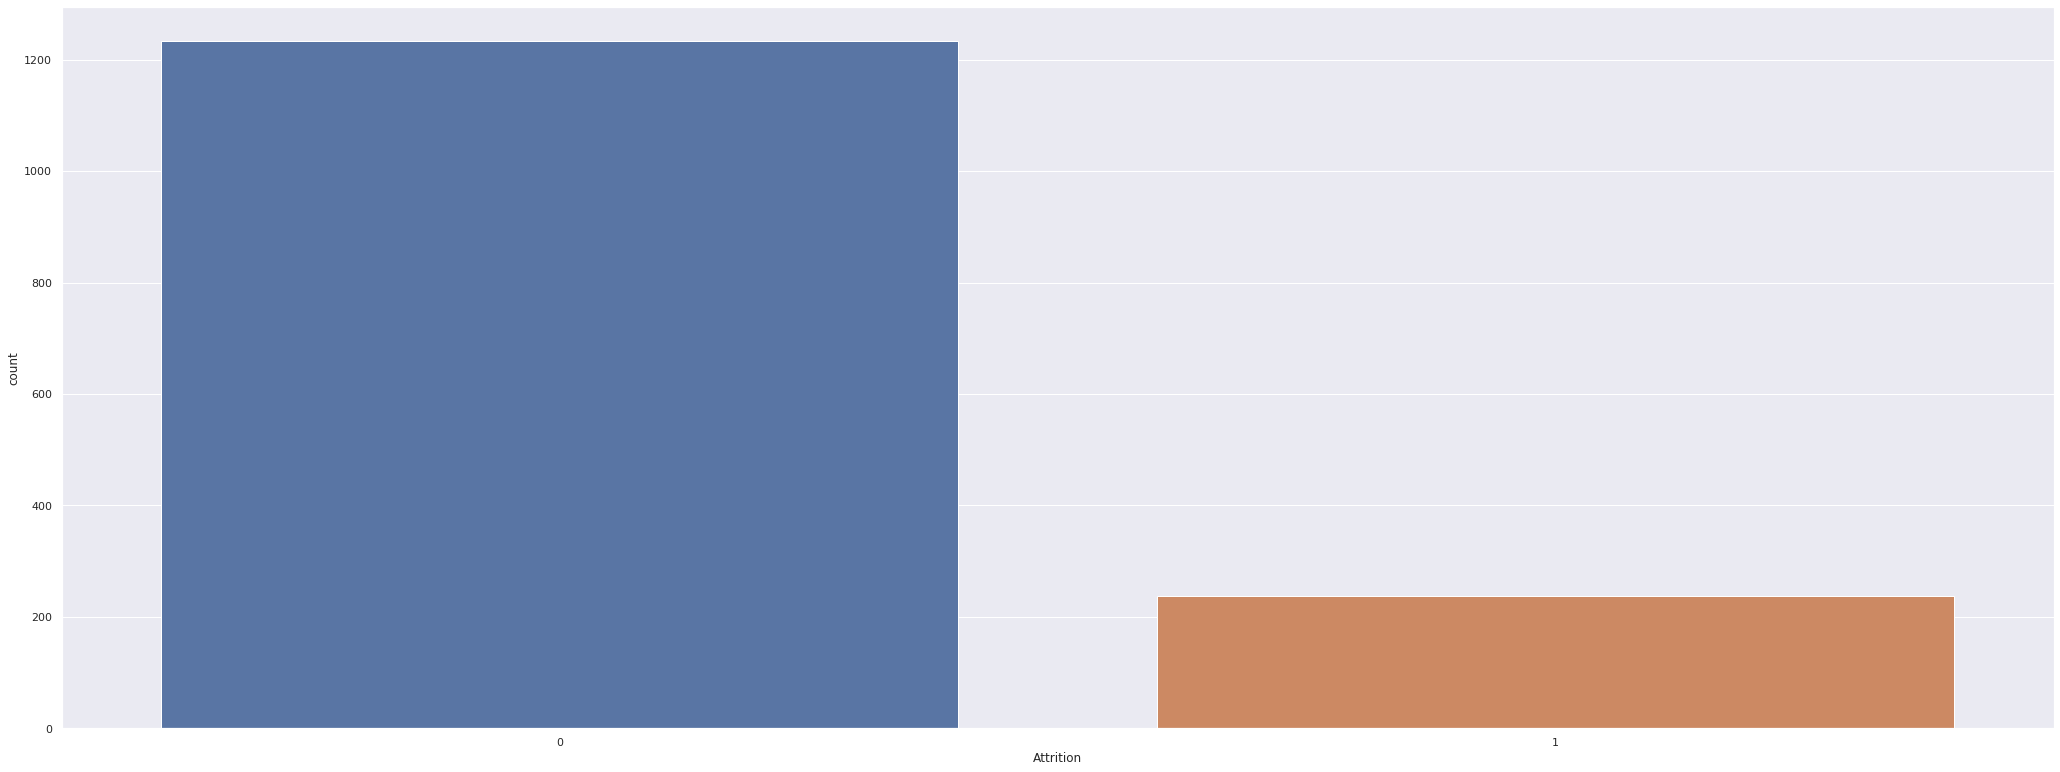

In [94]:
#Visualize this count 
sns.countplot(df['Attrition'])

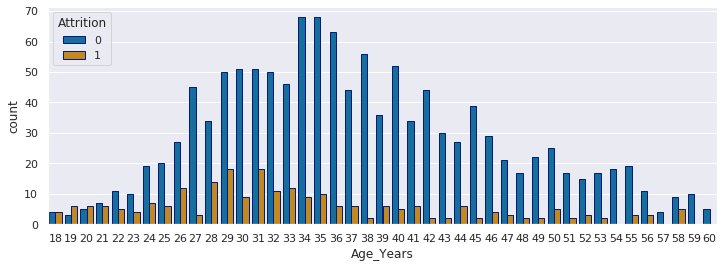

In [95]:
#Show the number of employees that left and stayed at the company by age.
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age_Years', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [96]:
# Create the model
model = LogisticRegression(C=10, class_weight='balanced')


# Use the training set from above to train the model
model.fit(X_train_res, y_train_res.ravel())

LogisticRegression(C=10, class_weight='balanced')

In [97]:
prediction=model.predict(X_test)

In [98]:
cm = confusion_matrix(Y_test,prediction)
print(cm)

[[234  76]
 [ 21  37]]


Step 3 - Evaluating the Model
There are four outcomes to a logistic regression classification engine:

True positive: model correctly predicted employee left. That's 234 cases.

False positive: model predicted employee would stay but they actually left. That's 76 cases.

False negative: model predicted employee would leave but they actually stayed. That's 21 cases.

True negative: model correctly predicted employee stayed. That's 37 cases.

In [99]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))

print(classification_report(Y_test, prediction))

Accuracy score: 0.7364130434782609
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       310
           1       0.33      0.64      0.43        58

    accuracy                           0.74       368
   macro avg       0.62      0.70      0.63       368
weighted avg       0.82      0.74      0.77       368



In [100]:
5. Model validation 
 

Finally, after testing our models with the test set, we concluded that best model was the Random Forest (RF). We can save the trained model using the Model Writer node. We based our decision on the statistics we see in the following table:

 

Predicting employee attrition with Machine Learning using Knime

 

RF has the highest accuracy, meaning it guesses 89.1% of the predictions correctly. Moreover, and more importantly, it has the highest F1 score, which gives a balance between precision and recall, and is the measure to use if the sample is unbalanced. The ROC curve is also a good measure to choose the best model. AUC stands for area under the curve, and the larger this is the better the model. Applying the ROC Curve node, we can visualize each ROC curve.

SyntaxError: invalid syntax (<ipython-input-100-f378fd6ebf7f>, line 1)

In [ ]:
These measures come from the confusion matrix, showing which predictions were correct (matrix diagonal) and which were not. We can check the confusion matrix out of the RF model.

https://www.clearpeaks.com/predicting-employee-attrition-with-machine-learning-using-knime/ #nop

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import plotly.graph_objs as go
import plotly.offline as py

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

import os
import itertools

sns.set_style('whitegrid')
sns.set_palette("Set2")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [103]:
""" Show the percentage breakdown of the target column. This also shows us the Baseline accuracy for our models. (83.9%) """

print('Percentage breakdown of Attrition')
print('-'*33)
round(df.Attrition.value_counts(normalize=True)*100,2)

Percentage breakdown of Attrition
---------------------------------


0    83.88
1    16.12
Name: Attrition, dtype: float64

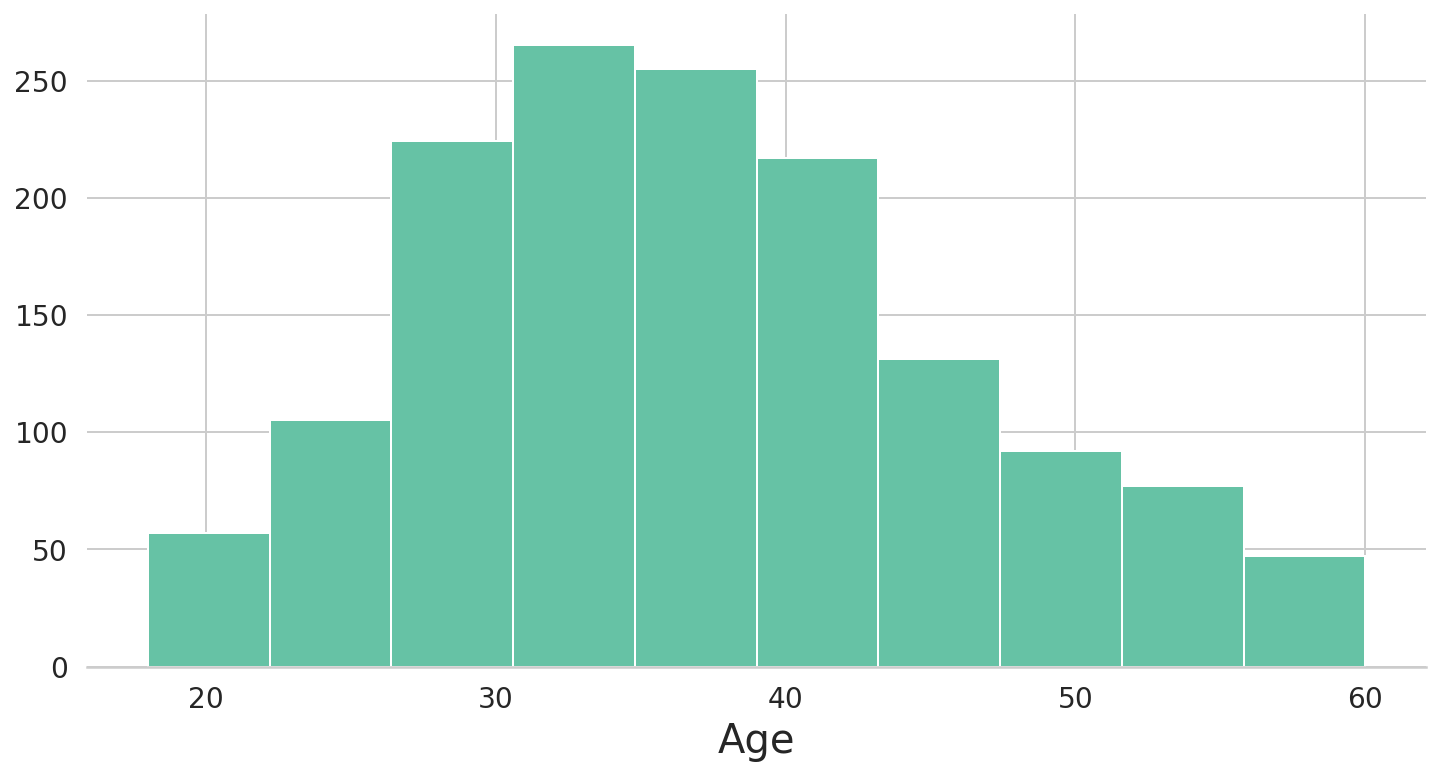

In [104]:
""" Plot the distribution of Age. """

plt.figure(figsize=(12,6))
fig = sns.distplot(df.Age_Years,kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
fig.set_xlabel('Age',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.show()

In [ ]:
This graph shows a normal distribution with a slightly positive skew as indicated by the longer tail going off toward the right hand side.


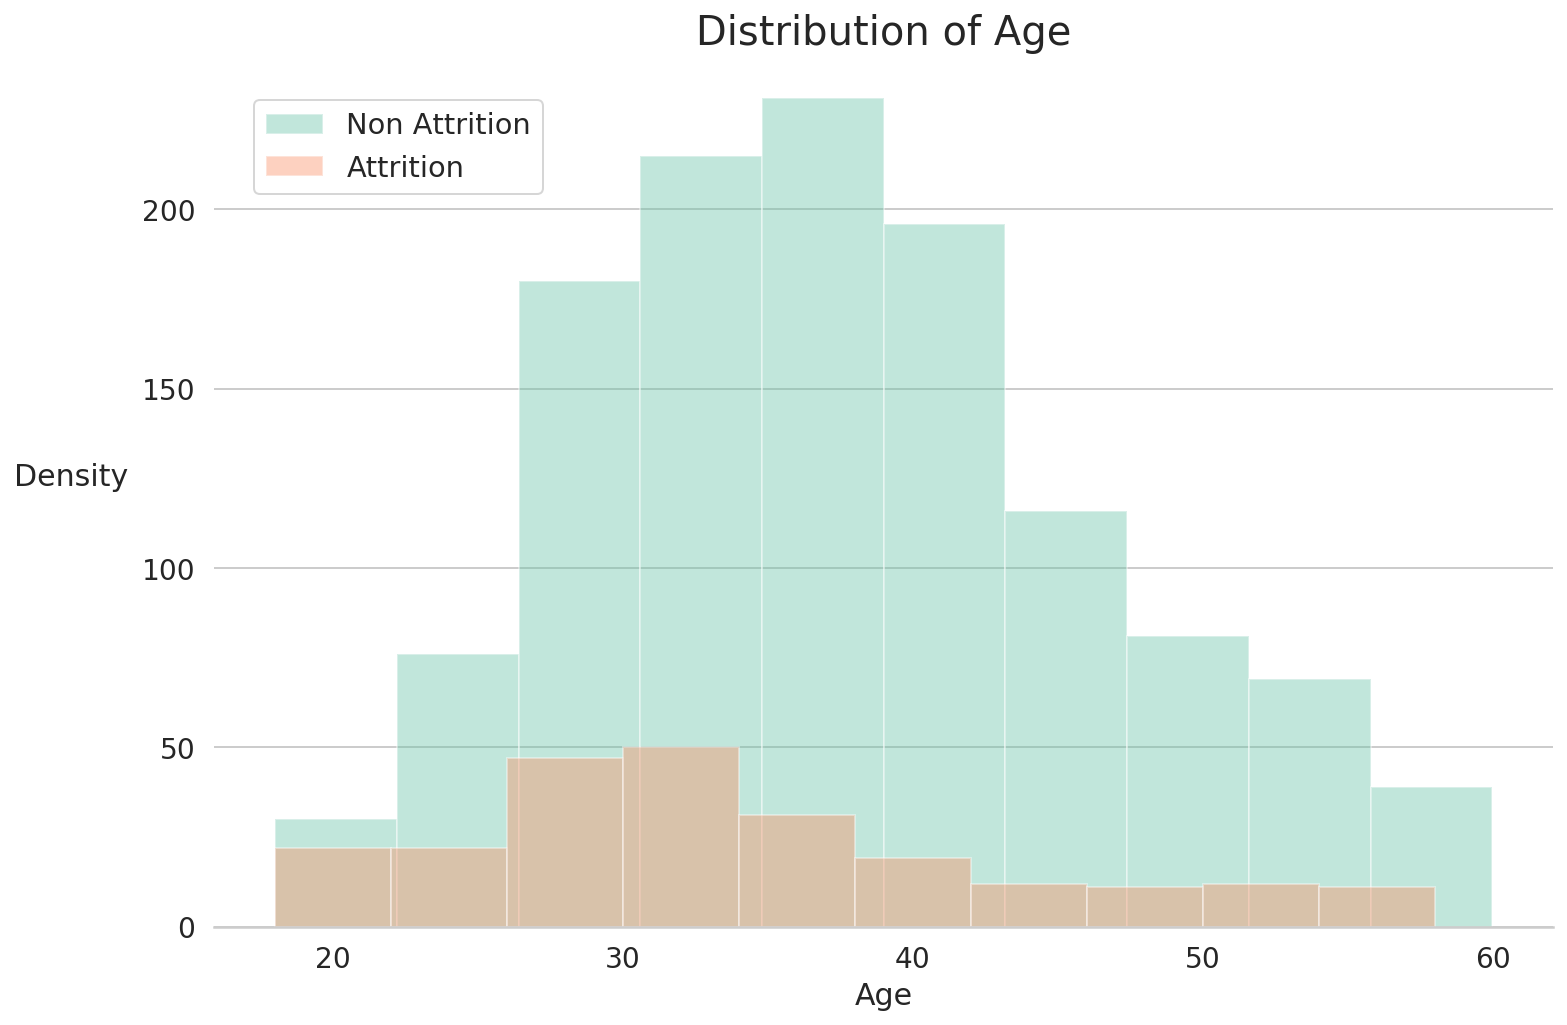

In [105]:
""" Plot the distribution of Age where attrition is true and false. """

plt.figure(figsize=(12,8))


""" Adjusting the bin size can alter the look of your graph, worth testing different sizes to see various plots. """
fig = sns.distplot(df[df['Attrition'] == 0]['Age_Years'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['Attrition'] == 1]['Age_Years'], label='Attrition', kde=0, bins=10)

sns.despine(left=1)

""" Removes the vertical gridlines. """
fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Age',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35

""" Control the size and positioning of the legend. """
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

From this graph, across all the age ranges we see attrition is present 
Attritionn in early 20s is all equally estable. 
Attrition seems to be to be lowest in the mid 40s, and is more lower as close as it gets to the retirement age.

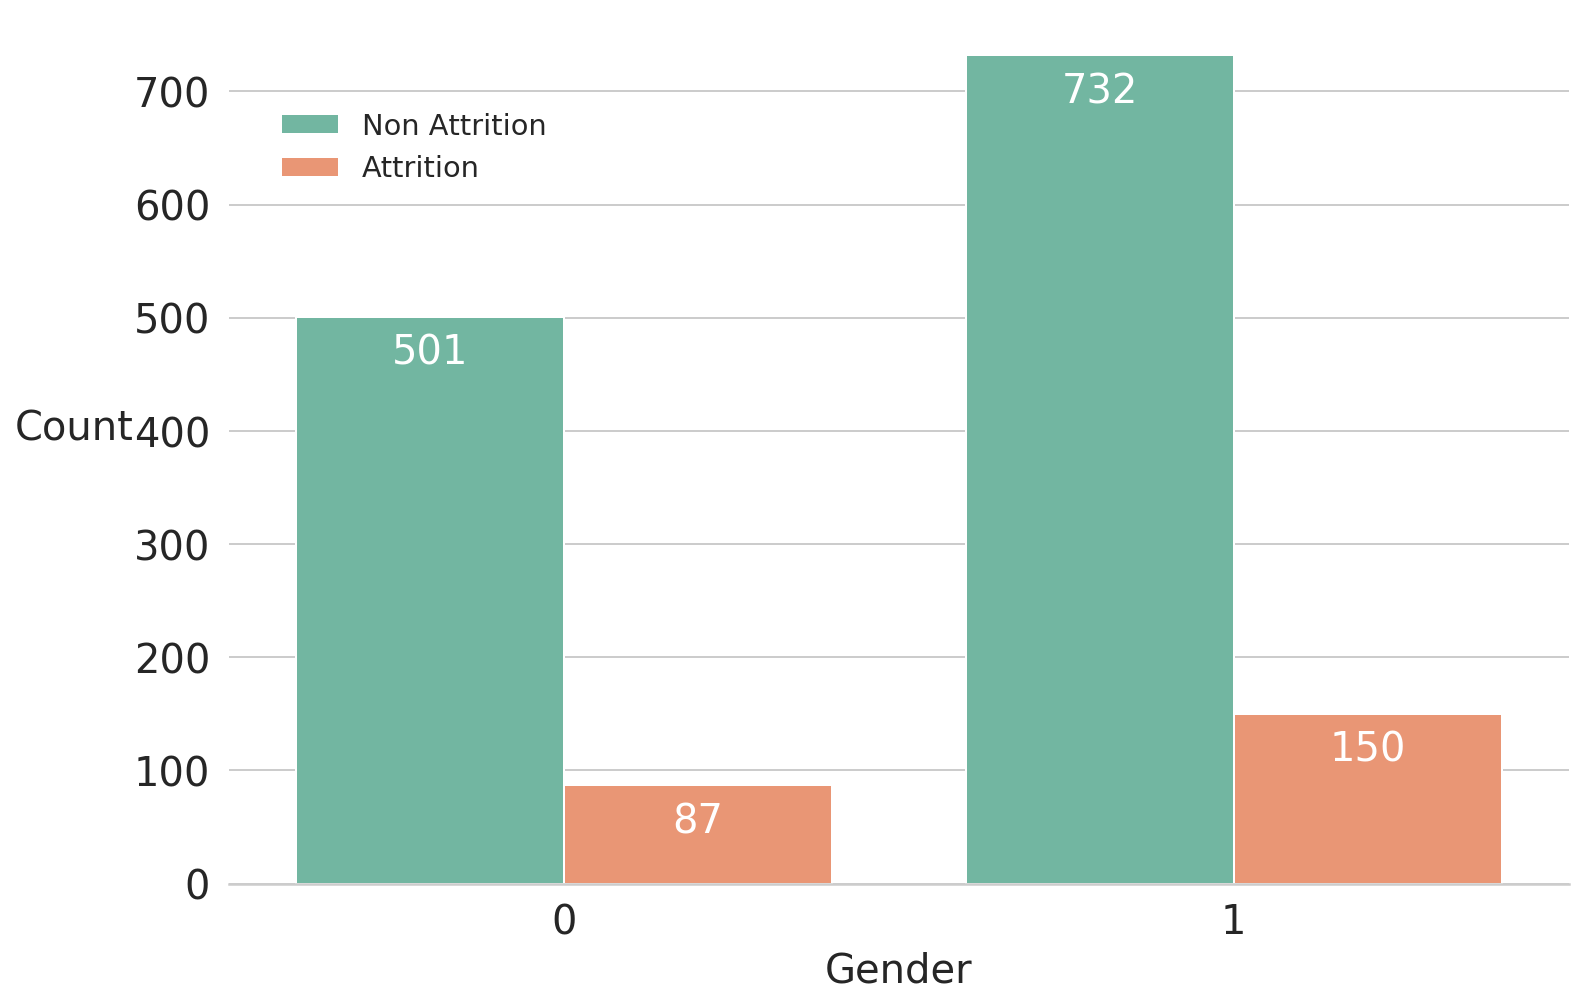

In [106]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='Gender', hue='Attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()


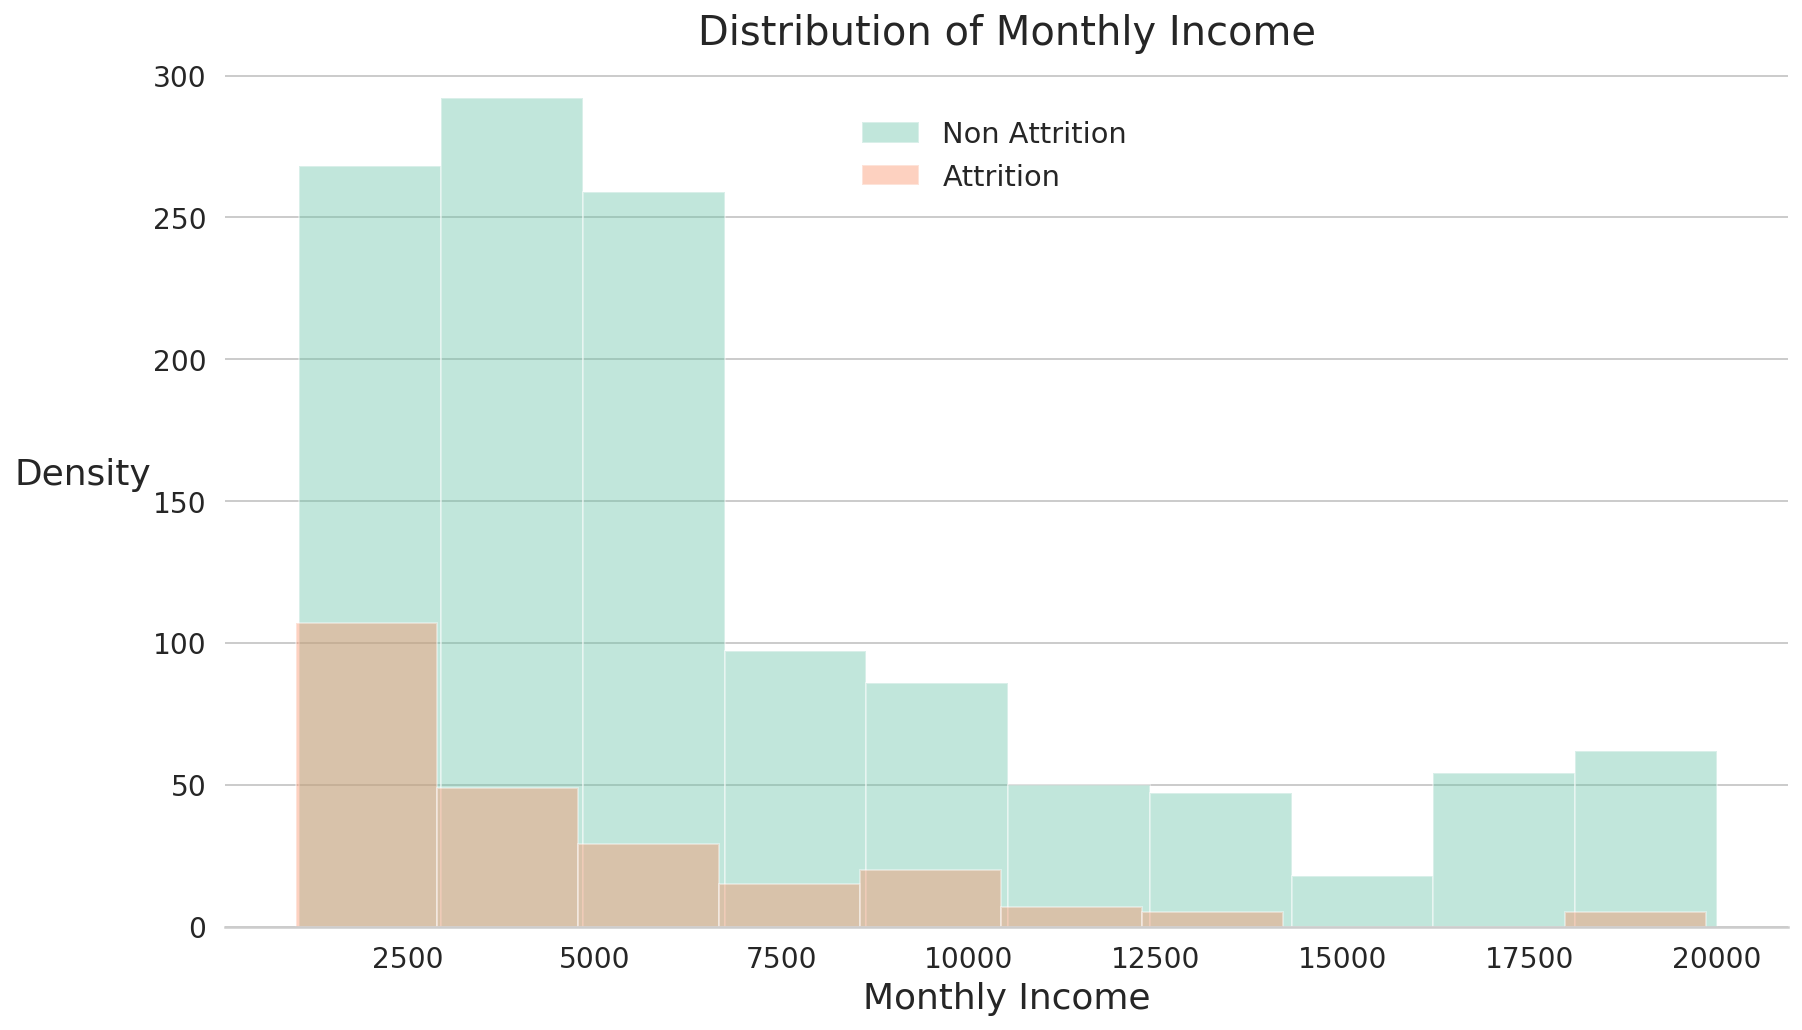

Average Monthly Income: 6502.931292517007
Average Monthly Income for Males: nan
Average Monthly Income for Females: nan


In [107]:
plt.figure(figsize=(14,8))
fig = sns.distplot(df[df['Attrition'] == 0]['MonthlyIncome'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['Attrition'] == 1]['MonthlyIncome'], label='Attrition', kde=0, bins=10)
sns.despine(left=1)
fig.grid(axis='x')
plt.xlabel('Monthly Income',fontsize=18)
plt.ylabel('Density',fontsize=18, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Monthly Income',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:',df.MonthlyIncome.mean())
print('Average Monthly Income for Males:',df[df.Gender == 'Male']['MonthlyIncome'].mean())
print('Average Monthly Income for Females:',df[df.Gender == 'Female']['MonthlyIncome'].mean())

As expected, attrition is higher when the salaries are lower. And it gets lower as we get close to higher salaries.
Happens similar with non attrition that is also higher with less monthly income.

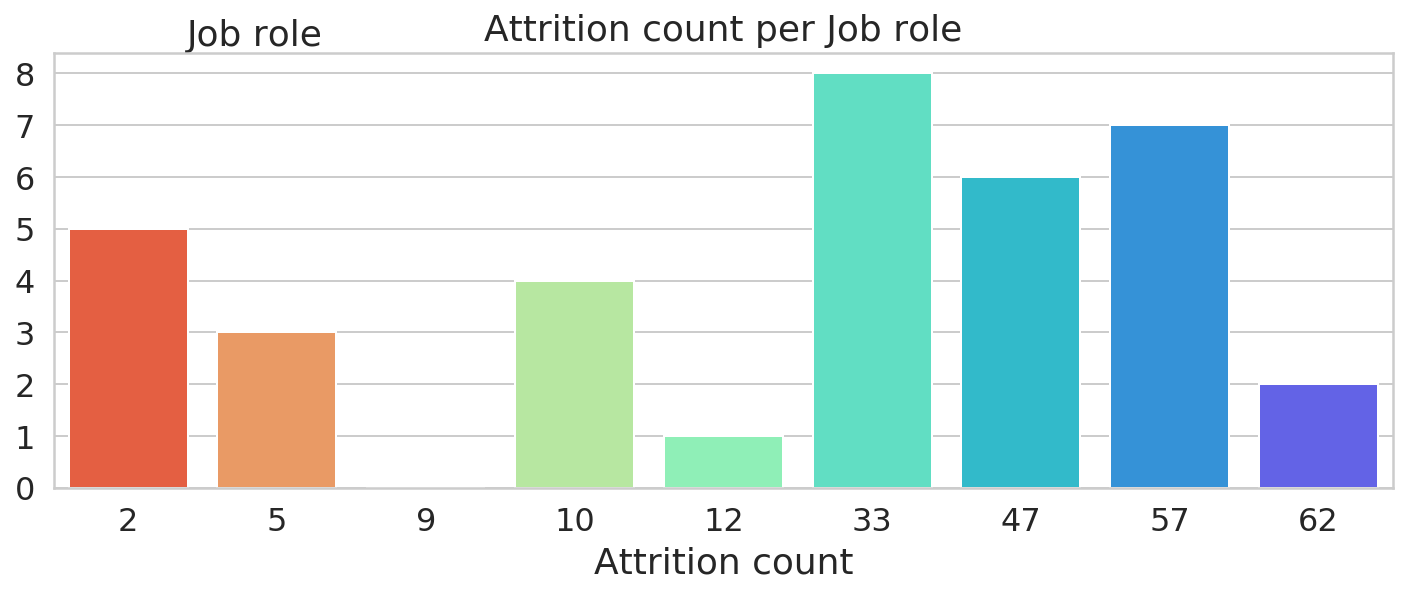

In [109]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=job_atr_df.index, x='JobRole', data=job_atr_df, 
                  palette=sns.color_palette("rainbow_r", n_colors=len(job_atr_df.index)))
fig.set_title('Attrition count per Job role',fontsize=18)
fig.set_xlabel('Attrition count', fontsize=18)
fig.set_ylabel('Job role', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -120
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()

The interesting thing to comment here, as we already mentioned earlier, is that with the highest paid jobs has the lowest attrition. Jobs such as Sales executive (33) however go against this trend with a higher average income whilst recording the second highest attrition rate out of all the job roles.

In [110]:
edu_sal = df.groupby('Education').mean().MonthlyIncome
edu_sal_df=pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('MonthlyIncome', ascending=False)

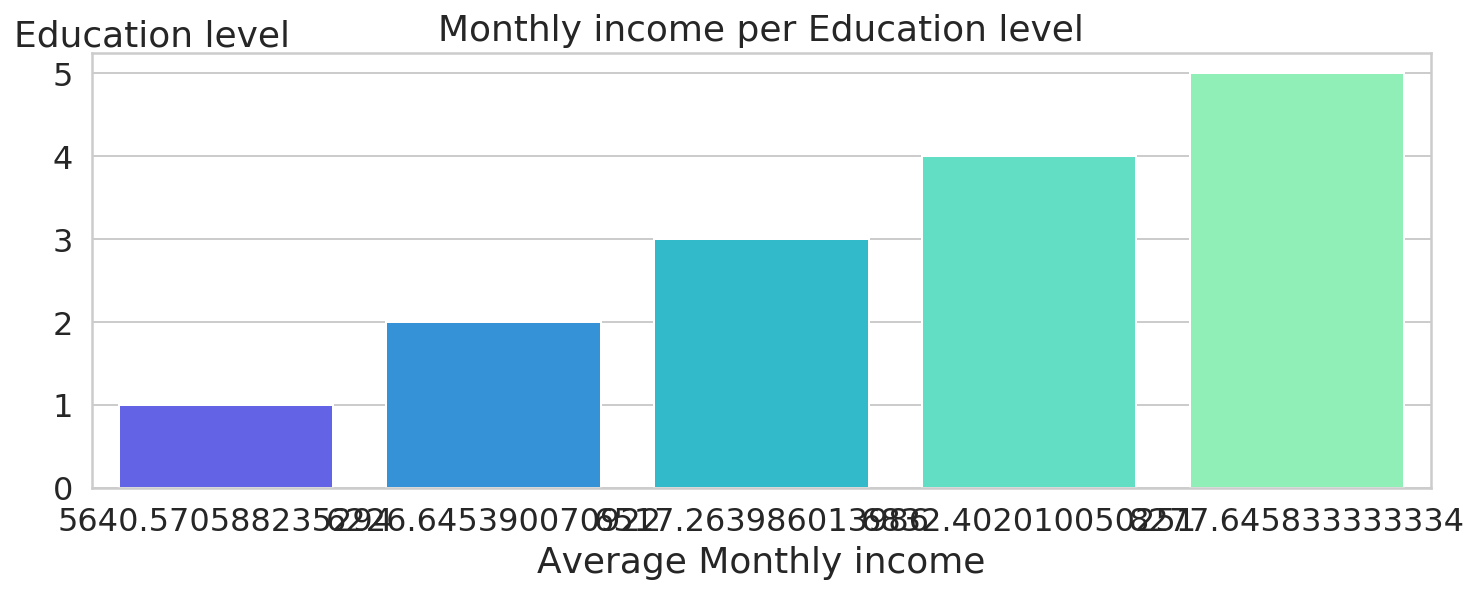

In [111]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=edu_sal_df.index, x='MonthlyIncome', data=edu_sal_df, 
                  palette=sns.color_palette("rainbow", n_colors=len(job_atr_df.index)))
fig.set_title('Monthly income per Education level',fontsize=18)
fig.set_xlabel('Average Monthly income', fontsize=18)
fig.set_ylabel('Education level', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -50
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()


As we all expect, income increases as long as the education is higher.

In [ ]:
df.columns

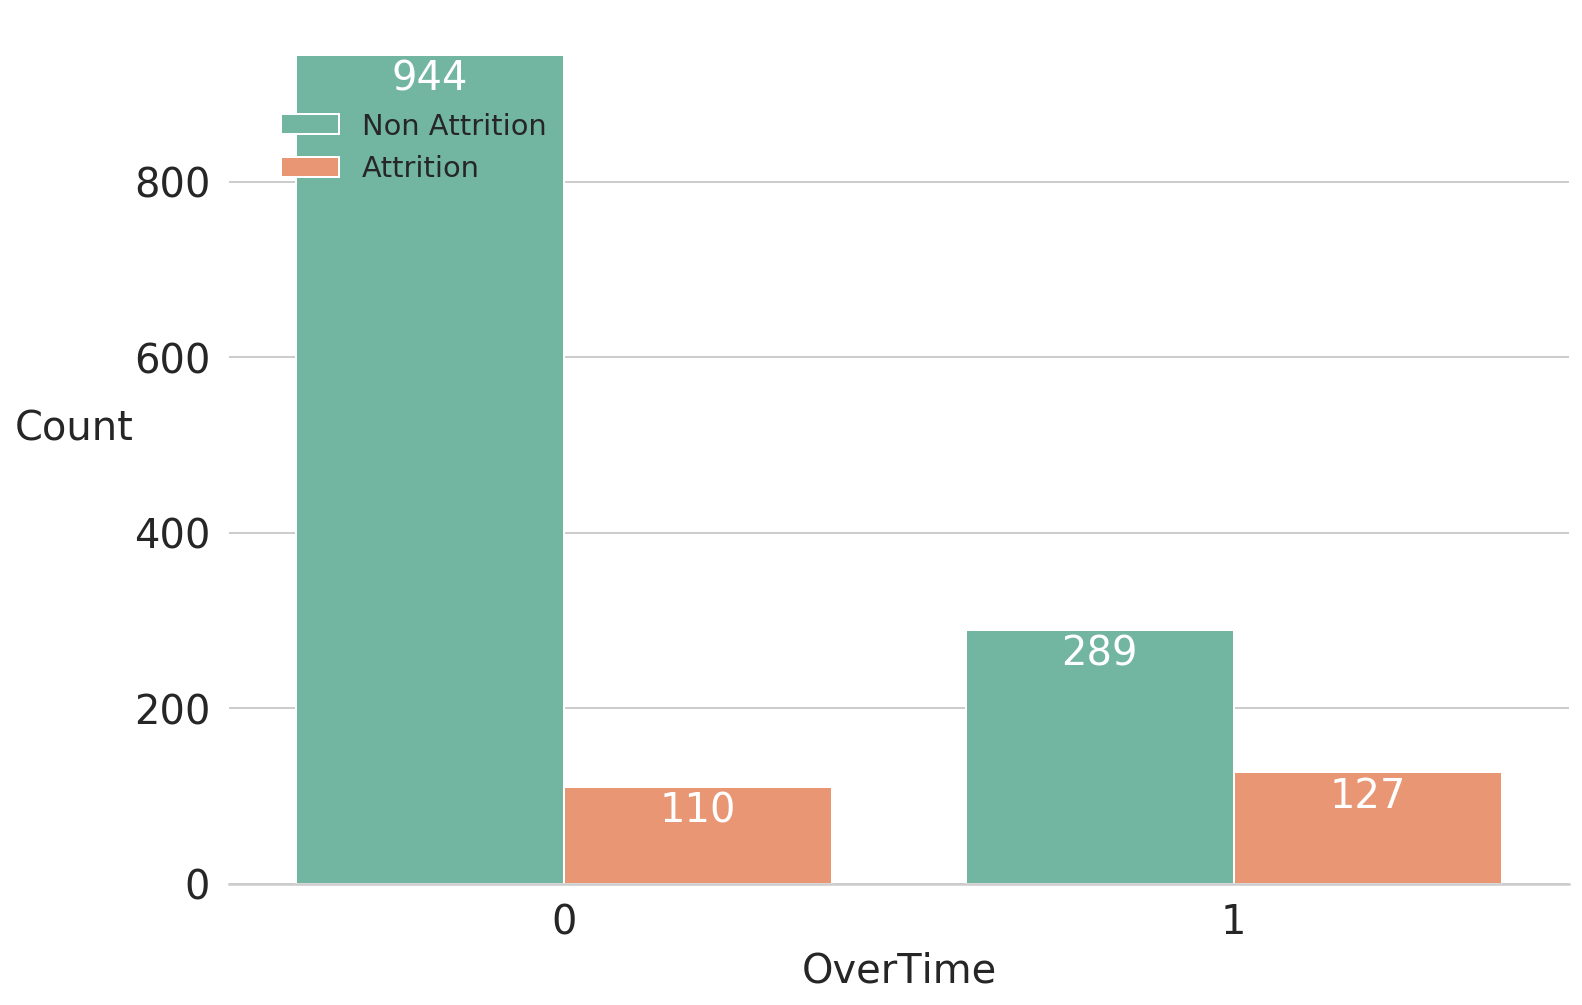

In [ ]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='OverTime', hue='Attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('OverTime', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

EDA Summary
From this brief EDA of the dataset there are numerous things that stand out in relation to attrition:

Attrition compared with Age:
Attrition seems to be more prevalent in the early career stages, most notebly between the ages of 20 and 30. It would be beneficial if we implement strategies to retain these younger employees and develop them within the business.

Attrition & monthly income
The employees with higher income are more less likely to quit their jobs. But we always have exceptions.

Attrition & overtime
Employees that worked overtime had a much higher rate of attrition than their colleagues that didnt have to. Another good strategy would be to improve employee retention, by minimising overtime hours, employee satisfaction could increase.




Implementing Machine Learning


Let's  train several model  that successfully predicts our target variable on test data more accurately. By utilizing numerous models, it is possible to train each model and then tune the best  performing model and get the output with the best possibly accuracy.



In [114]:
""" Defining the models i am going to use into a list. """
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 85.5978%
Log Loss: 0.37016146478229434
KNeighborsClassifier
****Results****
Accuracy: 79.8913%
Log Loss: 2.8732540351381317
SVC
****Results****
Accuracy: 84.2391%
Log Loss: 0.45004706732211436
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 9.992007221626413e-16
RandomForestClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.06212809069837379
[21:00:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.0018217177457700018
AdaBoostClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 9.992007221626413e-16
GradientBoostingClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 1.1578901261600006e-05
GaussianNB
****Results****
Accuracy: 99.4565%
Log Loss: 0.0270123

After training all the different classification models and visualising their accuracy and log loss, multiple models managed to predict more accurately. However, from here we can now choose the best model and do the model tuning: Since we have several algorithms with 100% accuracy, we can choose any of those. And we will select one with less log loss which is XGBClassifier.

In [116]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.model_selection import cross_val_score, KFold

In [117]:
from sklearn.metrics import mean_absolute_error

In [133]:
#Model Tuning
""" Create the parameter grid that will be supplied and applied to the model on each iteration. """

param_grid =  {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(XGBClassifier(), param_grid)


In [134]:
clf.fit(X_train, Y_train)
clf.param_grid

[21:24:41] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:41] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluatio

{'nthread': [4],
 'objective': ['binary:logistic'],
 'learning_rate': [0.05],
 'max_depth': [6],
 'min_child_weight': [11],
 'silent': [1],
 'subsample': [0.8],
 'colsample_bytree': [0.7],
 'n_estimators': [5],
 'missing': [-999],
 'seed': [1337]}

In [135]:
""" Print out the best parameters for the model, along with the final score utilizing these parameters. """
print(clf.best_params_)
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=1337, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)
0.9819004524886878
Accuracy of the best classifier after CV is 100.00%


In [126]:
""" Create the parameter grid that will be supplied and applied to the model on each iteration. """

param_grid = {'n_neighbors': range(0,10), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1, cv=3, n_jobs=-1)
KNN_results=clf.fit(X_train,Y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [127]:
KNN_results.best_score_

0.8402934091537336

In [128]:
KNN_results.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [129]:
KNN_results.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}

In [130]:
""" Print out the best parameters for the model KNN, along with the final score utilizing these parameters. """
print(clf.best_params_)
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100)) 

#As we see, even KNN can't improve the accuracy obtained by XGBoostClassifier:



{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=6)
0.8402934091537336
Accuracy of the best classifier after CV is 84.78%


Conclusion
Final model:
Through the use of many different classification models, and tuning the best performing, my final model which is XGBClassifier was predicting with a 98.19% accuracy.
And after cv, the accuracy is 100%


Now that we have a proper model, we can start evaluating it’s performace in a more accurate way.

For further Evaluation, let's print confusion matrix:

In [137]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

[21:25:13] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:25:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:13] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:25:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluatio

array([[923,   0],
       [  0, 179]])

As we can see, we do not have neither false positive nor false negative. Great!

In [138]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 1.0
Recall: 1.0


Our model predicts 100% of the time, if a employed will be attrited or not. The recall tells us that it predicted the attrition of 100 % of the people who actually attrited.

F-Score You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [139]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

1.0

We have a 100% of F-score. The score is completely high, because we have a recall and precision of 100%. The F-score is perfect, because it favors classifiers that have a different precision and recall. This is a advantage, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

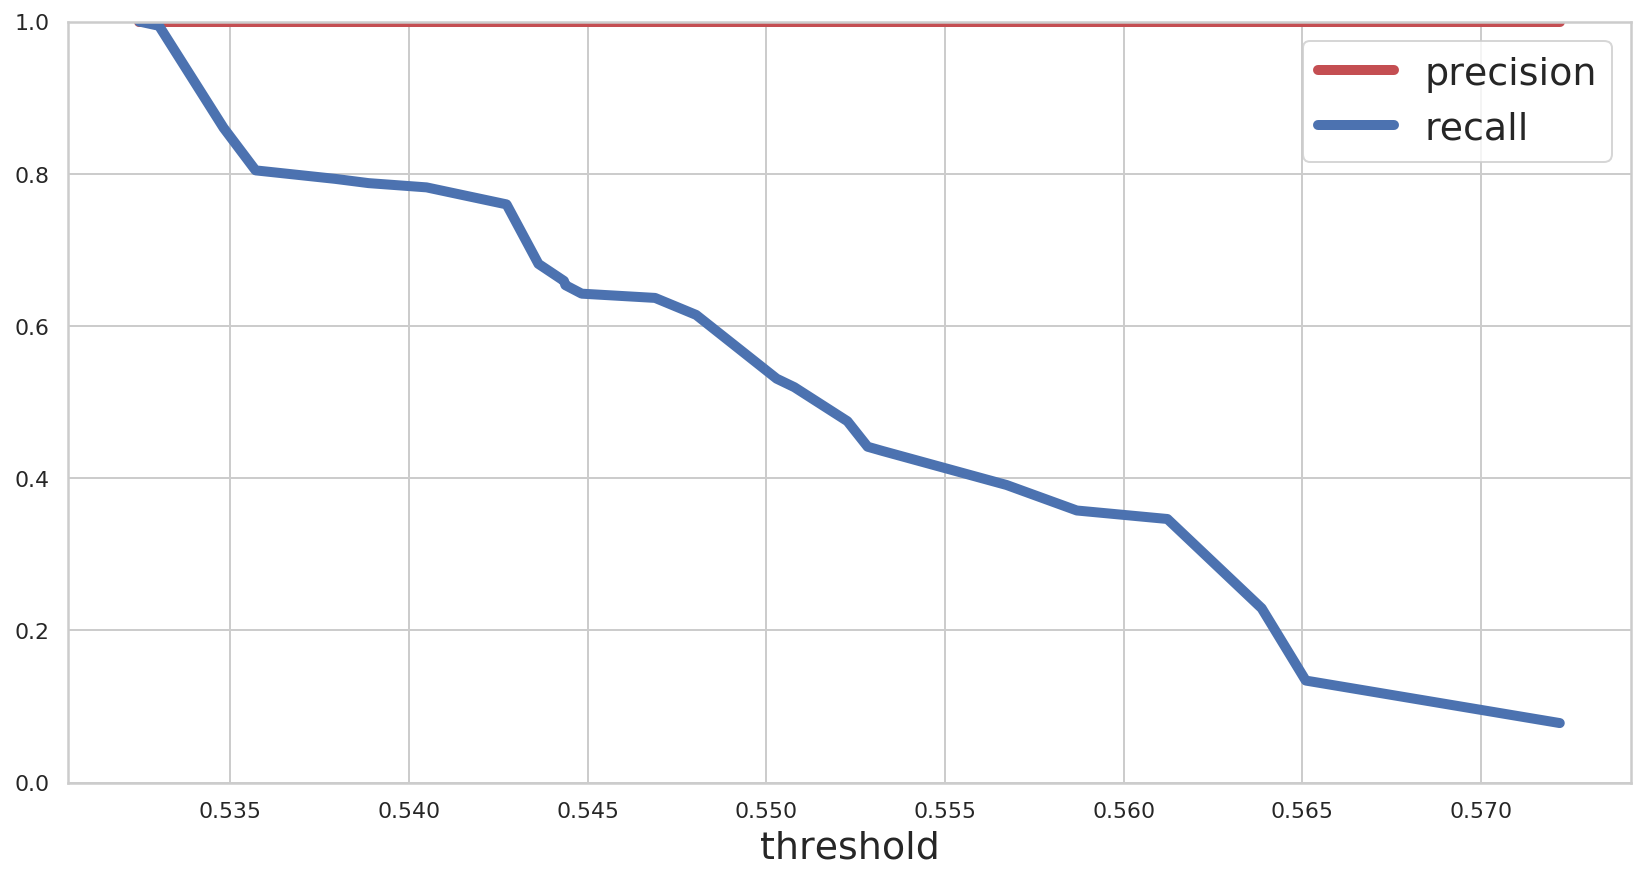

In [141]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = clf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly.

You can see that the threshold of the best precision/recall tradeoff for our case is pretty mush at the initial stage (upper side).

ROC AUC Curve 

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

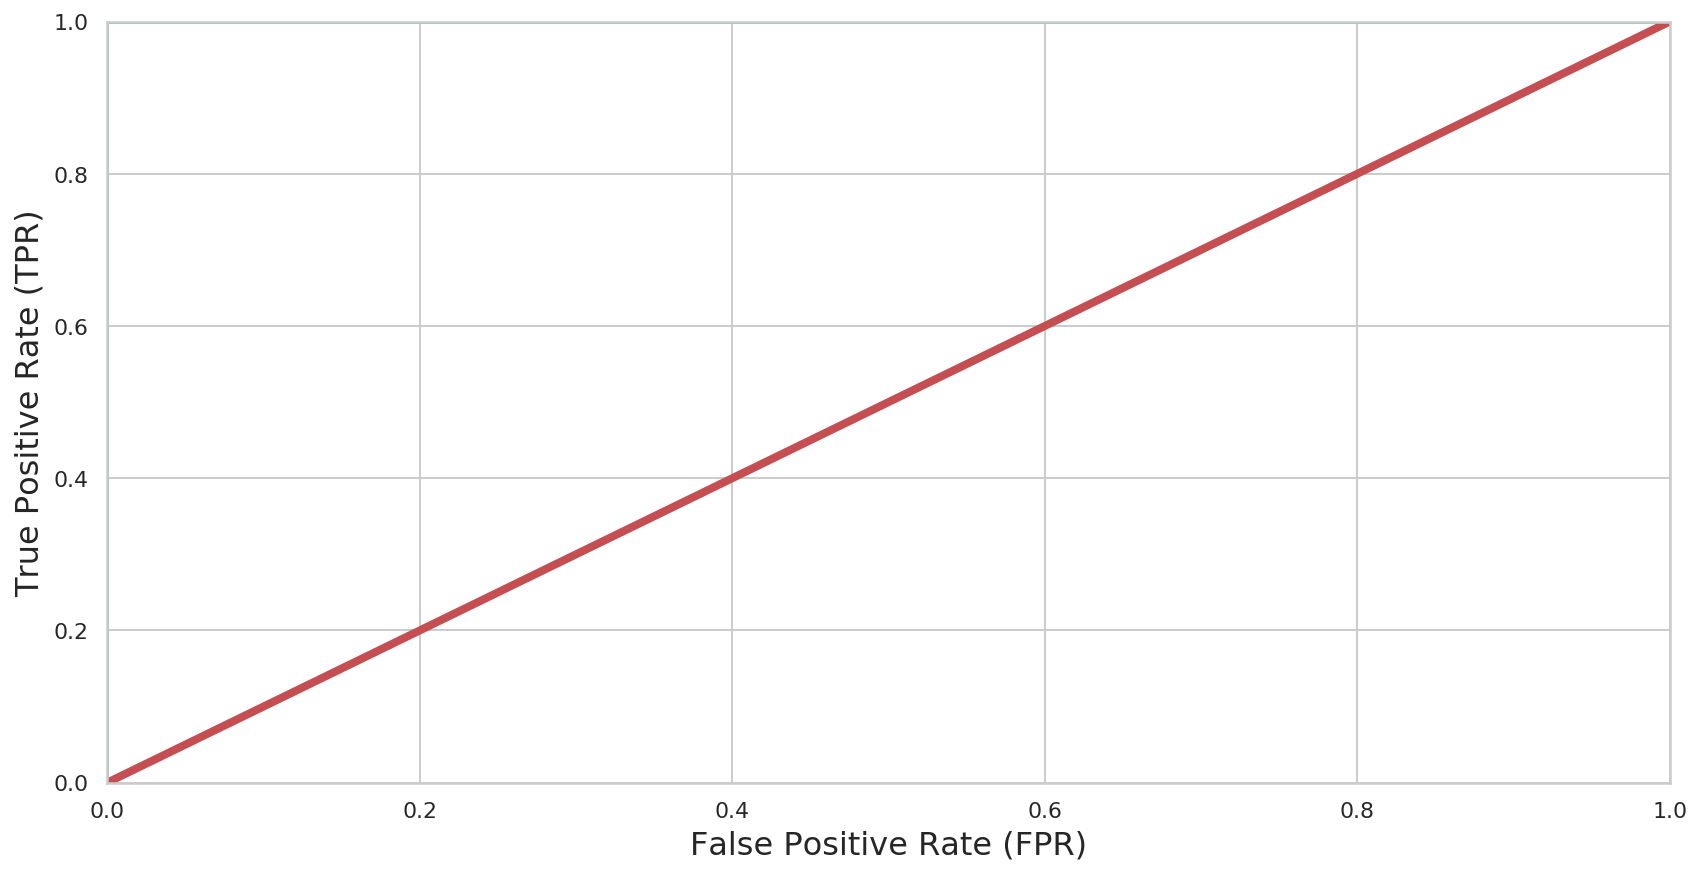

In [142]:

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [143]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


As you know, The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our XGBClassifier model seems to do a perfect job. 

ROC AUC Score 

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC. Our classifier XGB that is 100% correct, has a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

So ROC_AUC Score of 1.0 means our model works perfectly on our data and it can predict with the best accuracy!


In [144]:
import pickle
filename='Attrition.pkl'
pickle.dump(clf,open(filename,'wb'))

In [145]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Attrition.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

1.0


In [148]:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],predictions[:]],index=["Predicted","Original"])
Conclusion

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     0     0     1     0     1     0     1     0     0     1     0   
Original      0     0     0     0     0     0     1     0     0     0     1   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     1     0     1     0     0     0     1     0     0     0     0   
Original      0     0     0     0     0     0     1     0     0     0     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     1     0     0     1     0     0     0     0     0     1   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     1     0     0     0     0     1     0     0     0     0     0   
Original      0     0     0     0     0     0     0     0     0     1     1   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     1     0     0     1     1     0     1     0     0     1   
Original      0     0     0     0     0     1     0     0     1     0     1   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     1     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     0     0     1     0     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     1     1     0     1     0     0     0     0     0     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     0     1     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     1     0     0     0     0     0     0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     1     1     0     0     1     1     0     0     0     0   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     0     1     1     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     1     0     0     0     0     1   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     0     1     0     0     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     1     0     0     0     0     0     0     0     1   
Original      0     0     0     0     0     0     1     0     0     0     0   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     1     0     0     0     1     0     0     0     0     0     0   
Original      0     1     0     1     1     0     0     0     0     0     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     1     0     0     1     0     0     0     0     1   
Original      0     0     0     0     0     0     0     0     0     0     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     0     0     0     0     0     0     1     0     0     1     0   
Original      0     0     0     0     0     0     0     0     0     0     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     0     0     0     0     0     0     1     0     0     1     0   
Original      0     0     0     0     0     0     0     0     0     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     0     0     0     0     0     0     0     1     0     0     0   
Original      0     0     0     0     0     1

#Everything looks fine from the loaded model and tested predictions!

Great!